## Group 6 - Math for AI, AI23 @ HCMUS
- 23122013 - Đinh Đức Tài
- 23122002 - Nguyễn Đình Hà Dương
- 23122004 - Nguyễn Lê Hoàng Trung
- 23122014 - Hoàng Minh Trung

## [Lab1] Linear Regression

## Part 0: Import libs, define DataProcessor and functions

#### 0.1: Import libs: Numpy, Pandas, Matplotlib

In [1]:
# Importing the libraries: numpy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

from pygments.lexer import include

#### 0.2: Create class DataProcessor

In [2]:
class DataProcessor:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None
        self.original = True

    def load_data(self, isTest = False):
        """Load data from the CSV file."""
        self.data = pd.read_csv(self.file_path)
        if (not isTest): print("Data loaded successfully!")
        return self.data

    def get_summary(self):
        """Print a summary of the data."""
        print("Number of rows:", len(self.data))
        print("Column names:", self.data.columns.tolist())
        return self.data.describe()

    def head(self, n = 5):
        """Return the first n rows of the data."""
        return self.data.head(n)

    def null_info(self):
        """Print information about missing values."""
        print("\nNumber of rows with NaN values:", self.data.isna().any(axis=1).sum())

    def get_column_initial_info(self):
        print("\nInformation about the columns:")
        column_info = pd.DataFrame({
            'Column Name': self.data.columns,
            'Description': [
                "Hãng xe", "Mẫu xe", "Giá xe (VNĐ)", "Năm sản xuất", "Số km đã đi",
                "Loại nhiên liệu", "Hộp số", "Địa điểm bán", "Màu xe", "Số chủ sở hữu trước đó",
                "Loại người bán", "Dung tích động cơ (cc)", "Công suất tối đa (bhp)",
                "Mô-men xoắn tối đa (Nm)", "Hệ dẫn động", "Chiều dài xe (mm)",
                "Chiều rộng xe (mm)", "Chiều cao xe (mm)", "Số chỗ ngồi",
                "Dung tích bình nhiên liệu (lít)"
            ],
            'Data Type': self.data.dtypes.values,
            'Number of NaN': self.data.isna().sum().values,
            'Unique Values': self.data.nunique().values,
            'Most Frequent Value': self.data.mode().iloc[0].values,
        })

        return column_info

    def get_column_after_transform_info(self):
        print("\nInformation about the columns:")
        column_info = pd.DataFrame({
            'Column Name': self.data.columns,
            'Description': [
                "Hãng xe", "Mẫu xe", "Giá xe (VNĐ)", "Năm sản xuất", "Số km đã đi",
                "Loại nhiên liệu", "Hộp số", "Địa điểm bán", "Màu xe", "Số chủ sở hữu trước đó",
                "Loại người bán", "Dung tích động cơ (cc)", "Công suất tối đa (bhp)",
                "Mô-men xoắn tối đa (Nm)", "Hệ dẫn động", "Chiều dài xe (mm)",
                "Chiều rộng xe (mm)", "Chiều cao xe (mm)", "Số chỗ ngồi",
                "Dung tích bình nhiên liệu (lít)", 'Vòng tua tại Công suất tối đa (rpm)',
                'Vòng tua tại Mô-men xoắn tối đa (rpm)',
            ],
            'Data Type': self.data.dtypes.values,
            'Number of NaN': self.data.isna().sum().values,
            'Unique Values': self.data.nunique().values,
            'Most Frequent Value': self.data.mode().iloc[0].values,
        })

        return column_info

#### 0.3: Get infomation about unique values functions

In [3]:
def get_some_unique_values(self):
    print("\nUnique values of some columns:")
    print("Fuel Type:", self.data['Fuel Type'].unique())
    print("Transmission:", self.data['Transmission'].unique())
    print("Seller Type:", self.data['Seller Type'].unique())
    print("Drivetrain:", self.data['Drivetrain'].unique())

    print("Owner:", self.data['Owner'].unique())
    print("Seating Capacity:", self.data['Seating Capacity'].unique())

def unique_values(self):
    object_columns = self.data.select_dtypes(include=['object']).columns
    numeric_columns = self.data.select_dtypes(include=['float64', 'int64']).columns

    # List of object columns and their unique values
    object_columns_list = [(col, self.data[col].nunique()) for col in object_columns]

    # List of numeric columns and their unique values
    numeric_columns_list = [(col, self.data[col].nunique()) for col in numeric_columns]

    print("Object Columns and number of unique values: {}".format(len(object_columns_list)))
    print(object_columns_list)

    print("\nNumeric Columns and number of unique values: {}".format(len(numeric_columns_list)))
    print(numeric_columns_list)
    self.numeric_columns = self.data.select_dtypes(include=['float64', 'int64']).columns
    self.object_columns = self.data.select_dtypes(include=['object']).columns
    return numeric_columns, object_columns

DataProcessor.get_some_unique_values = get_some_unique_values
DataProcessor.unique_values = unique_values

#### 0.4: Clean and transform data functions

In [4]:
def clean_data(self):
    """Clean the data by handling missing values and duplicates."""
    # Handle missing values
    # Fill numeric columns with their mean
    numeric_columns = self.data.select_dtypes(include=['float64', 'int64']).columns
    self.data[numeric_columns] = self.data[numeric_columns].fillna(self.data[numeric_columns].mean().astype(int))

    # Fill categorical columns with the most frequent value
    categorical_columns = self.data.select_dtypes(include=['object']).columns
    self.data[categorical_columns] = self.data[categorical_columns].fillna(self.data[categorical_columns].mode().iloc[0])

    # Remove duplicates
    self.data = self.data.drop_duplicates()

    # Reset index after cleaning
    self.data.reset_index(drop=True, inplace=True)

def transform_data(self):
    """Transform data by standardizing specific columns."""
    # 'Engine' ('cc') -> float
    self.data['Engine'] = self.data['Engine'].astype(str).str.replace(' cc', '').astype(float)

    # Extract RPM values from the original string values before conversion
    if (self.original is True):
        self.data['rpm at Max Power'] = (
            self.data['Max Power']
            .astype(str)
            .str.extract(r'@\s*(\d+)\s*rpm', expand=False)
        )
        self.data['rpm at Max Torque'] = (
            self.data['Max Torque']
            .astype(str)
            .str.extract(r'@\s*(\d+)\s*rpm', expand=False)
        )
    self.original = False

    # Fill missing values with the most frequent value
    self.data['rpm at Max Power'] = self.data['rpm at Max Power'].fillna(self.data['rpm at Max Power'].mode().iloc[0])
    self.data['rpm at Max Torque'] = self.data['rpm at Max Torque'].fillna(self.data['rpm at Max Torque'].mode().iloc[0])

    # 'rpm at Max Power' -> int
    self.data['rpm at Max Power'] = self.data['rpm at Max Power'].astype(int)

    # 'rpm at Max Torque' -> int
    self.data['rpm at Max Torque'] = self.data['rpm at Max Torque'].astype(int)

    # 'Max Power' ('bhp') -> int
    self.data['Max Power'] = self.data['Max Power'].astype(str).str.extract(r'(\d+)', expand=False).astype(int)

    # 'Max Torque' ('Nm') -> int
    self.data['Max Torque'] = self.data['Max Torque'].astype(str).str.extract(r'(\d+)', expand=False).astype(int)

    # 'Seating Capacity' -> int
    self.data['Seating Capacity'] = self.data['Seating Capacity'].astype(int)

    # 'Fuel Tank Capacity' -> int
    self.data['Fuel Tank Capacity'] = self.data['Fuel Tank Capacity'].astype(int)

    # 'Owner' -> int
    self.data['Owner'] = self.data['Owner'].map({
        'UnRegistered Car': 0,
        'First': 1,
        'Second': 2,
        'Third': 3,
        'Fourth': 4,
        '4 or More': 5,
        0: 0,
        1: 1,
        2: 2,
        3: 3,
        4: 4,
        5: 5,
    })

    self.numeric_columns = self.data.select_dtypes(include=['float64', 'int64']).columns
    self.object_columns = self.data.select_dtypes(include=['object']).columns

DataProcessor.clean_data = clean_data
DataProcessor.transform_data = transform_data

#### 0.5: Data visualization functions

In [5]:
def plot_corr_matrix(self, width=12, height=8):
    # Compute the correlation matrix using only numeric features
    corr_matrix = self.data[self.numeric_columns].corr()

    # Plot the correlation matrix using matplotlib
    plt.figure(figsize=(width, height))
    plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
    plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
    plt.title("Correlation Matrix of Numeric Features")

    # Annotate the matrix with correlation coefficients
    for i in range(len(corr_matrix)):
        for j in range(len(corr_matrix)):
            plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

    plt.tight_layout()
    plt.show()

def plot_distribution_of_numeric_columns(self):
    # Plot histograms for all numeric columns
    num_cols = self.numeric_columns

    num_cols_count = len(num_cols)
    n_cols = 3  # Number of columns in the figure
    n_rows = (num_cols_count + n_cols - 1) // n_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3.5 * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(num_cols):
        axes[i].hist(self.data[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def box_plot_for_object_columns(self):
    for col in self.object_columns:
        if (col == 'Model'):
            continue
        plt.figure(figsize=(12, 3))
        categories = self.data[col].unique()
        groups = [self.data.loc[self.data[col] == category, 'Price'] for category in categories]
        plt.boxplot(groups, patch_artist=True, tick_labels=categories)
        plt.title(f'Box Plot: Price by {col}')
        plt.xlabel(col)
        plt.ylabel('Price')
        if (col == 'Location'):
            plt.xticks(rotation=90)
        elif (col == 'Fuel Type' or col == 'Transmission' or col == 'Seller Type' or col == 'Drivetrain'):
            plt.xticks(rotation=0)
        else:
            plt.xticks(rotation=60)
        plt.show()

def scatter_plot_for_numeric_columns(self):
    cols = [col for col in self.numeric_columns if col != 'Price']
    n_plots = len(cols)
    n_cols = 3
    n_rows = int(n_plots / n_cols) + 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        axes[i].scatter(self.data[col], self.data['Price'], alpha=0.5, color='blue', edgecolors='k')
        axes[i].set_title(f'Relationship between Price and {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Price')
        axes[i].grid(True, linestyle='--', alpha=0.7)

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

DataProcessor.plot_corr_matrix = plot_corr_matrix
DataProcessor.plot_distribution_of_numeric_columns = plot_distribution_of_numeric_columns
DataProcessor.box_plot_for_object_columns = box_plot_for_object_columns
DataProcessor.scatter_plot_for_numeric_columns = scatter_plot_for_numeric_columns

#### 0.6: Split dataset to train set and validation set

In [6]:
def train_valid_split(self, valid_size=0.2, random_state=None):
    """Split the data into training and validation sets, ensuring all unique 'Model' values are present in the training set."""
    train_set = copy.deepcopy(self)
    valid_set = copy.deepcopy(self)

    # Set random seed if provided
    if random_state is not None:
        np.random.seed(random_state)

    # Identify unique models
    unique_models = self.data['Model'].unique()

    # Create training indices: start with an empty list
    train_indices = []

    # Iterate through each unique model
    for model in unique_models:
        # Get indices where the 'Model' column equals the current unique model
        model_indices = self.data[self.data['Model'] == model].index.tolist()

        # Randomly choose one index for each model to be included in the training set
        # This ensures that at least one sample of each model is in the training set
        chosen_index = np.random.choice(model_indices)
        train_indices.append(chosen_index)

    # Create remaining indices for the training set
    remaining_count = int((1 - valid_size) * len(self.data)) - len(train_indices)
    remaining_indices = list(set(np.arange(len(self.data))) - set(train_indices))

    # Randomly sample from the remaining indices to complete the training set
    sampled_indices = np.random.choice(remaining_indices, size=remaining_count, replace=False).tolist()
    train_indices.extend(sampled_indices)

    # Create validation indices: the indices not in the training set
    valid_indices = list(set(np.arange(len(self.data))) - set(train_indices))

    # Shuffle the training indices
    np.random.shuffle(train_indices)

    # Assign data to train_set and valid_set
    train_set.data = self.data.iloc[train_indices].reset_index(drop=True)
    valid_set.data = self.data.iloc[valid_indices].reset_index(drop=True)

    return train_set, valid_set

DataProcessor.train_valid_split = train_valid_split

#### 0.7: Data Encoding

In [7]:
def encode_data(self):
    """
    Mã hóa các biến theo yêu cầu:
    - Hãng xe (Make): thay thế bằng giá trung vị của các xe thuộc hãng đó
    - Mẫu xe (Model): thay thế bằng giá trung vị của các xe cùng mẫu
    - Loại nhiên liệu (Fuel Type): Hybrid -> 1; Ngược lại -> 0
    - Hộp số (Transmission): Auto -> 1; Manual -> 0
    - Địa điểm (Location): nếu giá trung vị của Location ≥ giá trung vị toàn cục -> 1; ngược lại -> 0
    - Màu sắc (Color): Black, Blue, Yellow -> 1; ngược lại -> 0
    - Loại người bán (Seller Type): Corporate -> 1; Individual và Commercial Registration -> 0
    - Drivetrain: FWD -> 1, RWD -> 2, AWD -> 3
    """
    # Hãng xe: map giá trung vị theo Make
    make_median = self.data.groupby('Make')['Price'].median()
    self.data['Make'] = self.data['Make'].map(make_median)

    # Mẫu xe: map giá trung vị theo Model
    model_median = self.data.groupby('Model')['Price'].median()
    self.data['Model'] = self.data['Model'].map(model_median)

    # Loại nhiên liệu: chỉ giữ Hybrid = 1, còn lại = 0
    self.data['Fuel Type'] = self.data['Fuel Type'].apply(lambda x: 1 if x.strip().lower() == 'hybrid' else 0)

    # Hộp số: Auto = 1; Manual = 0
    self.data['Transmission'] = self.data['Transmission'].apply(lambda x: 1 if 'auto' in x.strip().lower() else 0)

    # Địa điểm: chia theo giá trung vị so với toàn bộ data
    global_median_price = self.data['Price'].median()
    location_medians = self.data.groupby('Location')['Price'].median()
    def encode_location(loc):
        return 1 if location_medians.loc[loc] >= global_median_price else 0
    self.data['Location'] = self.data['Location'].apply(encode_location)

    # Màu sắc: Black, Blue, Yellow -> 1; khác -> 0
    self.data['Color'] = self.data['Color'].apply(lambda x: 1 if x.strip().lower() in ['black', 'blue', 'yellow'] else 0)

    # Loại người bán: Corporate = 1; Individual và Commercial Registration = 0
    self.data['Seller Type'] = self.data['Seller Type'].apply(lambda x: 1 if x.strip().lower() == 'corporate' else 0)

    # Drivetrain: FWD = 1, RWD = 2, AWD = 3
    drivetrain_mapping = {'FWD': 1, 'RWD': 2, 'AWD': 3}
    self.data['Drivetrain'] = self.data['Drivetrain'].map(drivetrain_mapping)

    # Save numeric and object columns
    self.numeric_columns = self.data.select_dtypes(include=['float64', 'int64']).columns
    self.object_columns = self.data.select_dtypes(include=['object']).columns

    # Save encoding information for test set
    encoding_information = {}
    encoding_information['make_median'] = make_median
    encoding_information['model_median'] = model_median
    encoding_information['location_medians'] = location_medians
    encoding_information['global_median_price'] = global_median_price
    encoding_information['drivetrain_mapping'] = drivetrain_mapping

    return encoding_information

# Gắn hàm encode_data vào class DataProcessor
DataProcessor.encode_data = encode_data

def encode_data_test_set(self, encoding_information):
    """
    Mã hóa dữ liệu kiểm tra theo thông tin đã học từ tập huấn luyện:
    - Hãng xe (Make): thay thế bằng giá trung vị của các xe thuộc hãng đó
    - Mẫu xe (Model): thay thế bằng giá trung vị của các xe cùng mẫu
    - Loại nhiên liệu (Fuel Type): Hybrid -> 1; Ngược lại -> 0
    - Hộp số (Transmission): Auto -> 1; Manual -> 0
    - Địa điểm (Location): nếu giá trung vị của Location ≥ giá trung vị toàn cục -> 1; ngược lại -> 0
    - Màu sắc (Color): Black, Blue, Yellow -> 1; ngược lại -> 0
    - Loại người bán (Seller Type): Corporate -> 1; Individual và Commercial Registration -> 0
    - Drivetrain: FWD -> 1, RWD -> 2, AWD -> 3
    """
    # Hãng xe: map giá trung vị theo Make, use global_median_price for missing keys
    self.data['Make'] = self.data['Make'].apply(
        lambda x: encoding_information['make_median'].get(x, encoding_information['global_median_price'])
    )

    # Mẫu xe: map giá trung vị theo Model, use global_median_price for missing keys
    self.data['Model'] = self.data['Model'].apply(
        lambda x: encoding_information['model_median'].get(x, encoding_information['global_median_price'])
    )
    # Loại nhiên liệu: chỉ giữ Hybrid = 1, còn lại = 0
    self.data['Fuel Type'] = self.data['Fuel Type'].apply(lambda x: 1 if x.strip().lower() == 'hybrid' else 0)

    # Hộp số: Auto = 1; Manual = 0
    self.data['Transmission'] = self.data['Transmission'].apply(lambda x: 1 if 'auto' in x.strip().lower() else 0)

    # Địa điểm: chia theo giá trung vị so với toàn bộ data
    global_median_price = encoding_information['global_median_price']
    location_medians = encoding_information['location_medians']
    def encode_location(loc):
        try:
            return 1 if location_medians.loc[loc] >= global_median_price else 0
        except KeyError:
            return 0
    self.data['Location'] = self.data['Location'].apply(encode_location)

    # Màu sắc: Black, Blue, Yellow -> 1; khác -> 0
    self.data['Color'] = self.data['Color'].apply(lambda x: 1 if x.strip().lower() in ['black', 'blue', 'yellow'] else 0)

    # Loại người bán: Corporate = 1; Individual và Commercial Registration = 0
    self.data['Seller Type'] = self.data['Seller Type'].apply(lambda x: 1 if x.strip().lower() == 'corporate' else 0)

    # Drivetrain: FWD = 1, RWD = 2, AWD = 3
    drivetrain_mapping = encoding_information['drivetrain_mapping']
    self.data['Drivetrain'] = self.data['Drivetrain'].map(drivetrain_mapping)

    # Save numeric and object columns
    self.numeric_columns = self.data.select_dtypes(include=['float64', 'int64']).columns
    self.object_columns = self.data.select_dtypes(include=['object']).columns

# Gắn hàm encode_data_test_set vào class DataProcessor
DataProcessor.encode_data_test_set = encode_data_test_set

#### 0.8: Data Normalization

In [8]:
def normalize_data(self):
    """
    Chuẩn hóa các feature dữ liệu:
    - Áp dụng log transformation cho 'Price' và 'Kilometer' nhằm giảm ảnh hưởng do độ lệch quy mô.
    - Sau đó dùng MinMaxScaler chuẩn hóa toàn bộ các biến số."
    """

    # Áp dụng log1p (log(1+x)) để tránh lỗi với giá trị 0
    self.data['Kilometer'] = np.log1p(self.data['Kilometer'])

    # Chọn các cột số để scale
    numeric_cols = self.data.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = numeric_cols.drop(['Price'])

    min_vals = self.data[numeric_cols].min()
    max_vals = self.data[numeric_cols].max()
    range_vals = max_vals - min_vals
    # Avoid division by zero by replacing 0 differences with 1
    range_vals[range_vals == 0] = 1
    self.data[numeric_cols] = (self.data[numeric_cols] - min_vals) / range_vals

    return range_vals, min_vals, max_vals

DataProcessor.normalize_data = normalize_data

def normalize_data_test_set(self, range_vals, min_vals):
    """
    Chuẩn hóa dữ liệu kiểm tra theo thông tin đã học từ tập huấn luyện:
    - Áp dụng log transformation cho 'Price' và 'Kilometer' nhằm giảm ảnh hưởng do độ lệch quy mô.
    - Sau đó dùng MinMaxScaler chuẩn hóa toàn bộ các biến số."
    """
    # Áp dụng log1p (log(1+x)) để tránh lỗi với giá trị 0
    self.data['Kilometer'] = np.log1p(self.data['Kilometer'])

    # Chọn các cột số để scale
    numeric_cols = self.data.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = numeric_cols.drop(['Price'])

    # Normalize the test set
    self.data[numeric_cols] = (self.data[numeric_cols] - min_vals) / range_vals

DataProcessor.normalize_data_test_set = normalize_data_test_set

## Part I: Load and Explore data (train.csv)

In this part, we will load and explore some information about the original data.

In [9]:
# Initialize the DataProcessor class and load the data (train.csv)
file_path = './data/train.csv'
data = DataProcessor(file_path)
data.load_data()

# Print summary of the data
print("\nSummary of the data:")
data.get_summary()

# First 5 rows of data
print("\nFirst 5 rows of data:")
data.head()

Data loaded successfully!

Summary of the data:
Number of rows: 1647
Column names: ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

First 5 rows of data:


Make                            Model     Price  Year  Kilometer  \
0            BMW                    3-Series 320d    800000  2012      75576   
1            BMW               X1 sDrive20d xLine   2199000  2016      77000   
2       Mahindra                   XUV500 W4 1.99    800000  2017     112000   
3  Mercedes-Benz                  GLS 400d 4MATIC  12900000  2021       3000   
4         Toyota  Fortuner 2.8 4x2 AT [2016-2020]   3499000  2019      73000   

  Fuel Type Transmission     Location   Color   Owner Seller Type   Engine  \
0    Diesel    Automatic       Mumbai   White  Second  Individual      NaN   
1    Diesel    Automatic        Surat   Black   First  Individual  1995 cc   
2    Diesel       Manual  Muzaffurpur  Silver   First  Individual  1997 cc   
3    Diesel    Automatic        Delhi   White   First  Individual  2925 cc   
4    Diesel    Automatic       Mumbai   White   First  Individual  2755 cc   

            Max Power         Max Torque Drivetrain  Length   Width  Height  \
0                 NaN                NaN        NaN     NaN     NaN     NaN   
1  184 bhp @ 4000 rpm  350 Nm @ 1750 rpm        RWD  4454.0  2044.0  1545.0   
2  138 bhp @ 3750 rpm  320 Nm @ 1600 rpm        FWD  4585.0  1890.0  1785.0   
3  326 bhp @ 3600 rpm  700 Nm @ 1200 rpm        AWD  5207.0  2157.0  1823.0   
4  174 bhp @ 3400 rpm  450 Nm @ 1600 rpm        RWD  4795.0  1855.0  1835.0   

   Seating Capacity  Fuel Tank Capacity  
0               NaN                 NaN  
1               5.0                63.0  
2               7.0                70.0  
3               7.0                90.0  
4               7.0                80.0

In [10]:
# Print information about the null values
data.null_info()

# Print information about the columns
data.get_column_initial_info()


Number of rows with NaN values: 149

Information about the columns:


Column Name                      Description Data Type  \
0                 Make                          Hãng xe    object   
1                Model                           Mẫu xe    object   
2                Price                     Giá xe (VNĐ)     int64   
3                 Year                     Năm sản xuất     int64   
4            Kilometer                      Số km đã đi     int64   
5            Fuel Type                  Loại nhiên liệu    object   
6         Transmission                           Hộp số    object   
7             Location                     Địa điểm bán    object   
8                Color                           Màu xe    object   
9                Owner           Số chủ sở hữu trước đó    object   
10         Seller Type                   Loại người bán    object   
11              Engine           Dung tích động cơ (cc)    object   
12           Max Power           Công suất tối đa (bhp)    object   
13          Max Torque          Mô-men xoắn tối đa (Nm)    object   
14          Drivetrain                      Hệ dẫn động    object   
15              Length                Chiều dài xe (mm)   float64   
16               Width               Chiều rộng xe (mm)   float64   
17              Height                Chiều cao xe (mm)   float64   
18    Seating Capacity                      Số chỗ ngồi   float64   
19  Fuel Tank Capacity  Dung tích bình nhiên liệu (lít)   float64   

    Number of NaN  Unique Values Most Frequent Value  
0               0             31       Maruti Suzuki  
1               0            912  X1 sDrive20d xLine  
2               0            564              425000  
3               0             21                2017  
4               0            701               42000  
5               0              8              Diesel  
6               0              2              Manual  
7               0             76              Mumbai  
8               0             17               White  
9               0              6               First  
10              0              3          Individual  
11             65            101             1197 cc  
12             65            305   89 bhp @ 4000 rpm  
13             65            265   200 Nm @ 1750 rpm  
14            111              3                 FWD  
15             52            230              3995.0  
16             52            159              1695.0  
17             52            186              1475.0  
18             52              6                 5.0  
19             90             53                35.0

In [11]:
# Print the unique values of some columns
data.get_some_unique_values()


Unique values of some columns:
Fuel Type: ['Diesel' 'Petrol' 'CNG' 'LPG' 'CNG + CNG' 'Electric' 'Hybrid'
 'Petrol + LPG']
Transmission: ['Automatic' 'Manual']
Seller Type: ['Individual' 'Corporate' 'Commercial Registration']
Drivetrain: [nan 'RWD' 'FWD' 'AWD']
Owner: ['Second' 'First' 'Third' 'UnRegistered Car' '4 or More' 'Fourth']
Seating Capacity: [nan  5.  7.  2.  6.  8.  4.]


## Part II: Data Preprocessing

In this part, we split data into a training set and a validation set, fill NaN values, and perform some data transformation.

#### II.0: Split dataset

In [12]:
train_data, valid_data = data.train_valid_split(valid_size=0.2, random_state=0)

#### II.1: Data cleaning

In [13]:
# Clean the data and fill missing values
train_data.clean_data()
valid_data.clean_data()

# Print summary after cleaning
print("Data cleaned successfully!")
print("Number of rows after cleaning:", len(train_data.data))
print("Number of missing values after cleaning:", train_data.data.isna().sum().sum())

print("Data cleaned successfully!")
print("Number of rows after cleaning:", len(valid_data.data))
print("Number of missing values after cleaning:", valid_data.data.isna().sum().sum())

Data cleaned successfully!
Number of rows after cleaning: 1317
Number of missing values after cleaning: 0
Data cleaned successfully!
Number of rows after cleaning: 330
Number of missing values after cleaning: 0


#### II.2: Data Transformation

In [14]:
# Transform the data
train_data.transform_data()
valid_data.transform_data()

print("Data transformed successfully!")
print("\nData Transformation Details:")
print("- 'Engine' (cc) converted to float.")
print("- 'Max Power' (bhp) converted to integer.")
print("- 'Max Torque' (Nm) converted to integer.")
print("- Add 'rpm at Max Power' and converted to integer.")
print("- Add 'rpm at Max Torque' and converted to integer.")
print("- 'Seating Capacity' converted to integer.")
print("- 'Fuel Tank Capacity' converted to integer.")
print("- 'Owner' converted to numerical categories.")

Data transformed successfully!

Data Transformation Details:
- 'Engine' (cc) converted to float.
- 'Max Power' (bhp) converted to integer.
- 'Max Torque' (Nm) converted to integer.
- Add 'rpm at Max Power' and converted to integer.
- Add 'rpm at Max Torque' and converted to integer.
- 'Seating Capacity' converted to integer.
- 'Fuel Tank Capacity' converted to integer.
- 'Owner' converted to numerical categories.


#### II.3: Explore train data after preprocessing

In [15]:
train_data.get_column_after_transform_info()


Information about the columns:


Column Name                            Description Data Type  \
0                 Make                                Hãng xe    object   
1                Model                                 Mẫu xe    object   
2                Price                           Giá xe (VNĐ)     int64   
3                 Year                           Năm sản xuất     int64   
4            Kilometer                            Số km đã đi     int64   
5            Fuel Type                        Loại nhiên liệu    object   
6         Transmission                                 Hộp số    object   
7             Location                           Địa điểm bán    object   
8                Color                                 Màu xe    object   
9                Owner                 Số chủ sở hữu trước đó     int64   
10         Seller Type                         Loại người bán    object   
11              Engine                 Dung tích động cơ (cc)   float64   
12           Max Power                 Công suất tối đa (bhp)     int64   
13          Max Torque                Mô-men xoắn tối đa (Nm)     int64   
14          Drivetrain                            Hệ dẫn động    object   
15              Length                      Chiều dài xe (mm)   float64   
16               Width                     Chiều rộng xe (mm)   float64   
17              Height                      Chiều cao xe (mm)   float64   
18    Seating Capacity                            Số chỗ ngồi     int64   
19  Fuel Tank Capacity        Dung tích bình nhiên liệu (lít)     int64   
20    rpm at Max Power    Vòng tua tại Công suất tối đa (rpm)     int64   
21   rpm at Max Torque  Vòng tua tại Mô-men xoắn tối đa (rpm)     int64   

    Number of NaN  Unique Values              Most Frequent Value  
0               0             31                    Maruti Suzuki  
1               0            912  Fortuner 2.8 4x2 AT [2016-2020]  
2               0            507                           425000  
3               0             21                             2017  
4               0            595                            65000  
5               0              7                           Diesel  
6               0              2                           Manual  
7               0             72                           Mumbai  
8               0             17                            White  
9               0              5                                1  
10              0              3                       Individual  
11              0            100                           1197.0  
12              0            155                               89  
13              0            128                              200  
14              0              3                              FWD  
15              0            229                           3995.0  
16              0            159                           1695.0  
17              0            185                           1475.0  
18              0              6                                5  
19              0             50                               35  
20              0             36                             4000  
21              0             45                             1750

In [16]:
valid_data.get_column_after_transform_info()


Information about the columns:


Column Name                            Description Data Type  \
0                 Make                                Hãng xe    object   
1                Model                                 Mẫu xe    object   
2                Price                           Giá xe (VNĐ)     int64   
3                 Year                           Năm sản xuất     int64   
4            Kilometer                            Số km đã đi     int64   
5            Fuel Type                        Loại nhiên liệu    object   
6         Transmission                                 Hộp số    object   
7             Location                           Địa điểm bán    object   
8                Color                                 Màu xe    object   
9                Owner                 Số chủ sở hữu trước đó     int64   
10         Seller Type                         Loại người bán    object   
11              Engine                 Dung tích động cơ (cc)   float64   
12           Max Power                 Công suất tối đa (bhp)     int64   
13          Max Torque                Mô-men xoắn tối đa (Nm)     int64   
14          Drivetrain                            Hệ dẫn động    object   
15              Length                      Chiều dài xe (mm)   float64   
16               Width                     Chiều rộng xe (mm)   float64   
17              Height                      Chiều cao xe (mm)   float64   
18    Seating Capacity                            Số chỗ ngồi     int64   
19  Fuel Tank Capacity        Dung tích bình nhiên liệu (lít)     int64   
20    rpm at Max Power    Vòng tua tại Công suất tối đa (rpm)     int64   
21   rpm at Max Torque  Vòng tua tại Mô-men xoắn tối đa (rpm)     int64   

    Number of NaN  Unique Values Most Frequent Value  
0               0             22       Maruti Suzuki  
1               0            215  X1 sDrive20d xLine  
2               0            228            450000.0  
3               0             16              2018.0  
4               0            209               45000  
5               0              5              Diesel  
6               0              2              Manual  
7               0             51               Delhi  
8               0             15               White  
9               0              5                 1.0  
10              0              3          Individual  
11              0             53              1197.0  
12              0             76                89.0  
13              0             72               200.0  
14              0              3                 FWD  
15              0            103              3995.0  
16              0             80              1695.0  
17              0             86              1475.0  
18              0              5                 5.0  
19              0             36                35.0  
20              0             25              4000.0  
21              0             26              1750.0

In [17]:
# Find models in validation set that are not in train set
train_models = train_data.data['Model'].unique()
validation_models = valid_data.data['Model'].unique()

new_models = [model for model in validation_models if model not in train_models]

print("Models in validation set but not in train set:", new_models)

Models in validation set but not in train set: []


In [18]:
train_data.get_some_unique_values()


Unique values of some columns:
Fuel Type: ['Petrol' 'Diesel' 'CNG' 'Electric' 'LPG' 'Hybrid' 'Petrol + LPG']
Transmission: ['Manual' 'Automatic']
Seller Type: ['Individual' 'Corporate' 'Commercial Registration']
Drivetrain: ['FWD' 'AWD' 'RWD']
Owner: [2 1 0 3 4]
Seating Capacity: [5 4 7 2 8 6]


In [19]:
# Print number of unique values for each column
numeric_columns, object_columns = train_data.unique_values()
print()
numeric_columns, object_columns = valid_data.unique_values()

# Create save point: after preprocessing
train_data_after_preprocessing = copy.deepcopy(train_data)
validation_data_after_preprocessing = copy.deepcopy(valid_data)

Object Columns and number of unique values: 8
[('Make', 31), ('Model', 912), ('Fuel Type', 7), ('Transmission', 2), ('Location', 72), ('Color', 17), ('Seller Type', 3), ('Drivetrain', 3)]

Numeric Columns and number of unique values: 14
[('Price', 507), ('Year', 21), ('Kilometer', 595), ('Owner', 5), ('Engine', 100), ('Max Power', 155), ('Max Torque', 128), ('Length', 229), ('Width', 159), ('Height', 185), ('Seating Capacity', 6), ('Fuel Tank Capacity', 50), ('rpm at Max Power', 36), ('rpm at Max Torque', 45)]

Object Columns and number of unique values: 8
[('Make', 22), ('Model', 215), ('Fuel Type', 5), ('Transmission', 2), ('Location', 51), ('Color', 15), ('Seller Type', 3), ('Drivetrain', 3)]

Numeric Columns and number of unique values: 14
[('Price', 228), ('Year', 16), ('Kilometer', 209), ('Owner', 5), ('Engine', 53), ('Max Power', 76), ('Max Torque', 72), ('Length', 103), ('Width', 80), ('Height', 86), ('Seating Capacity', 5), ('Fuel Tank Capacity', 36), ('rpm at Max Power', 25),

## Part III: Data visualization

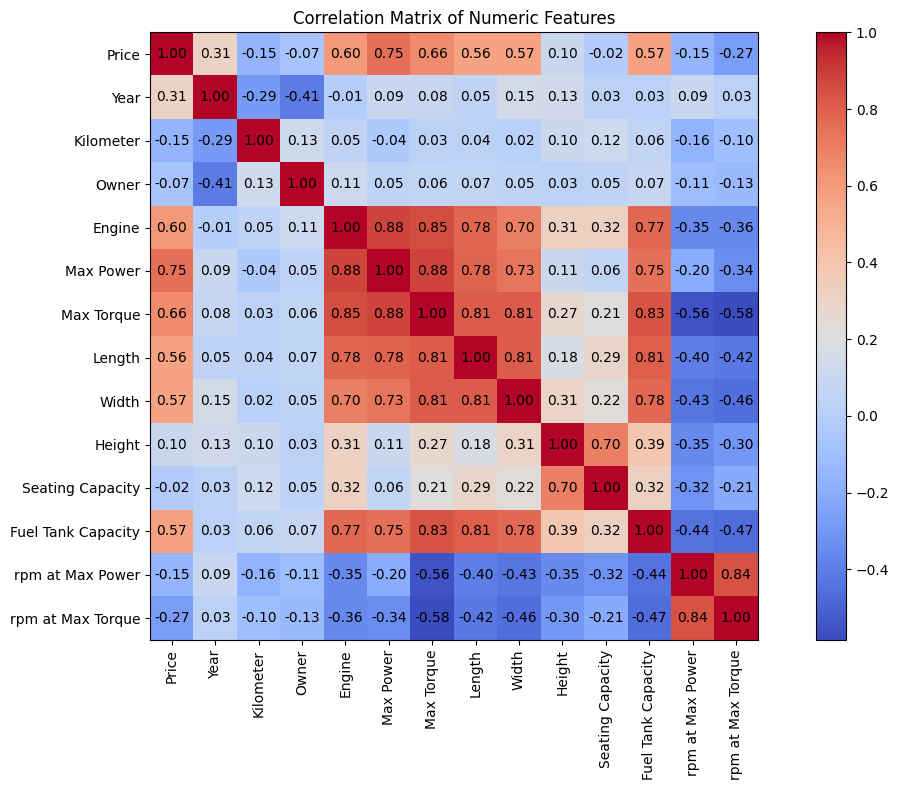

In [20]:
# 1. Plot the correlation matrix
train_data.plot_corr_matrix()

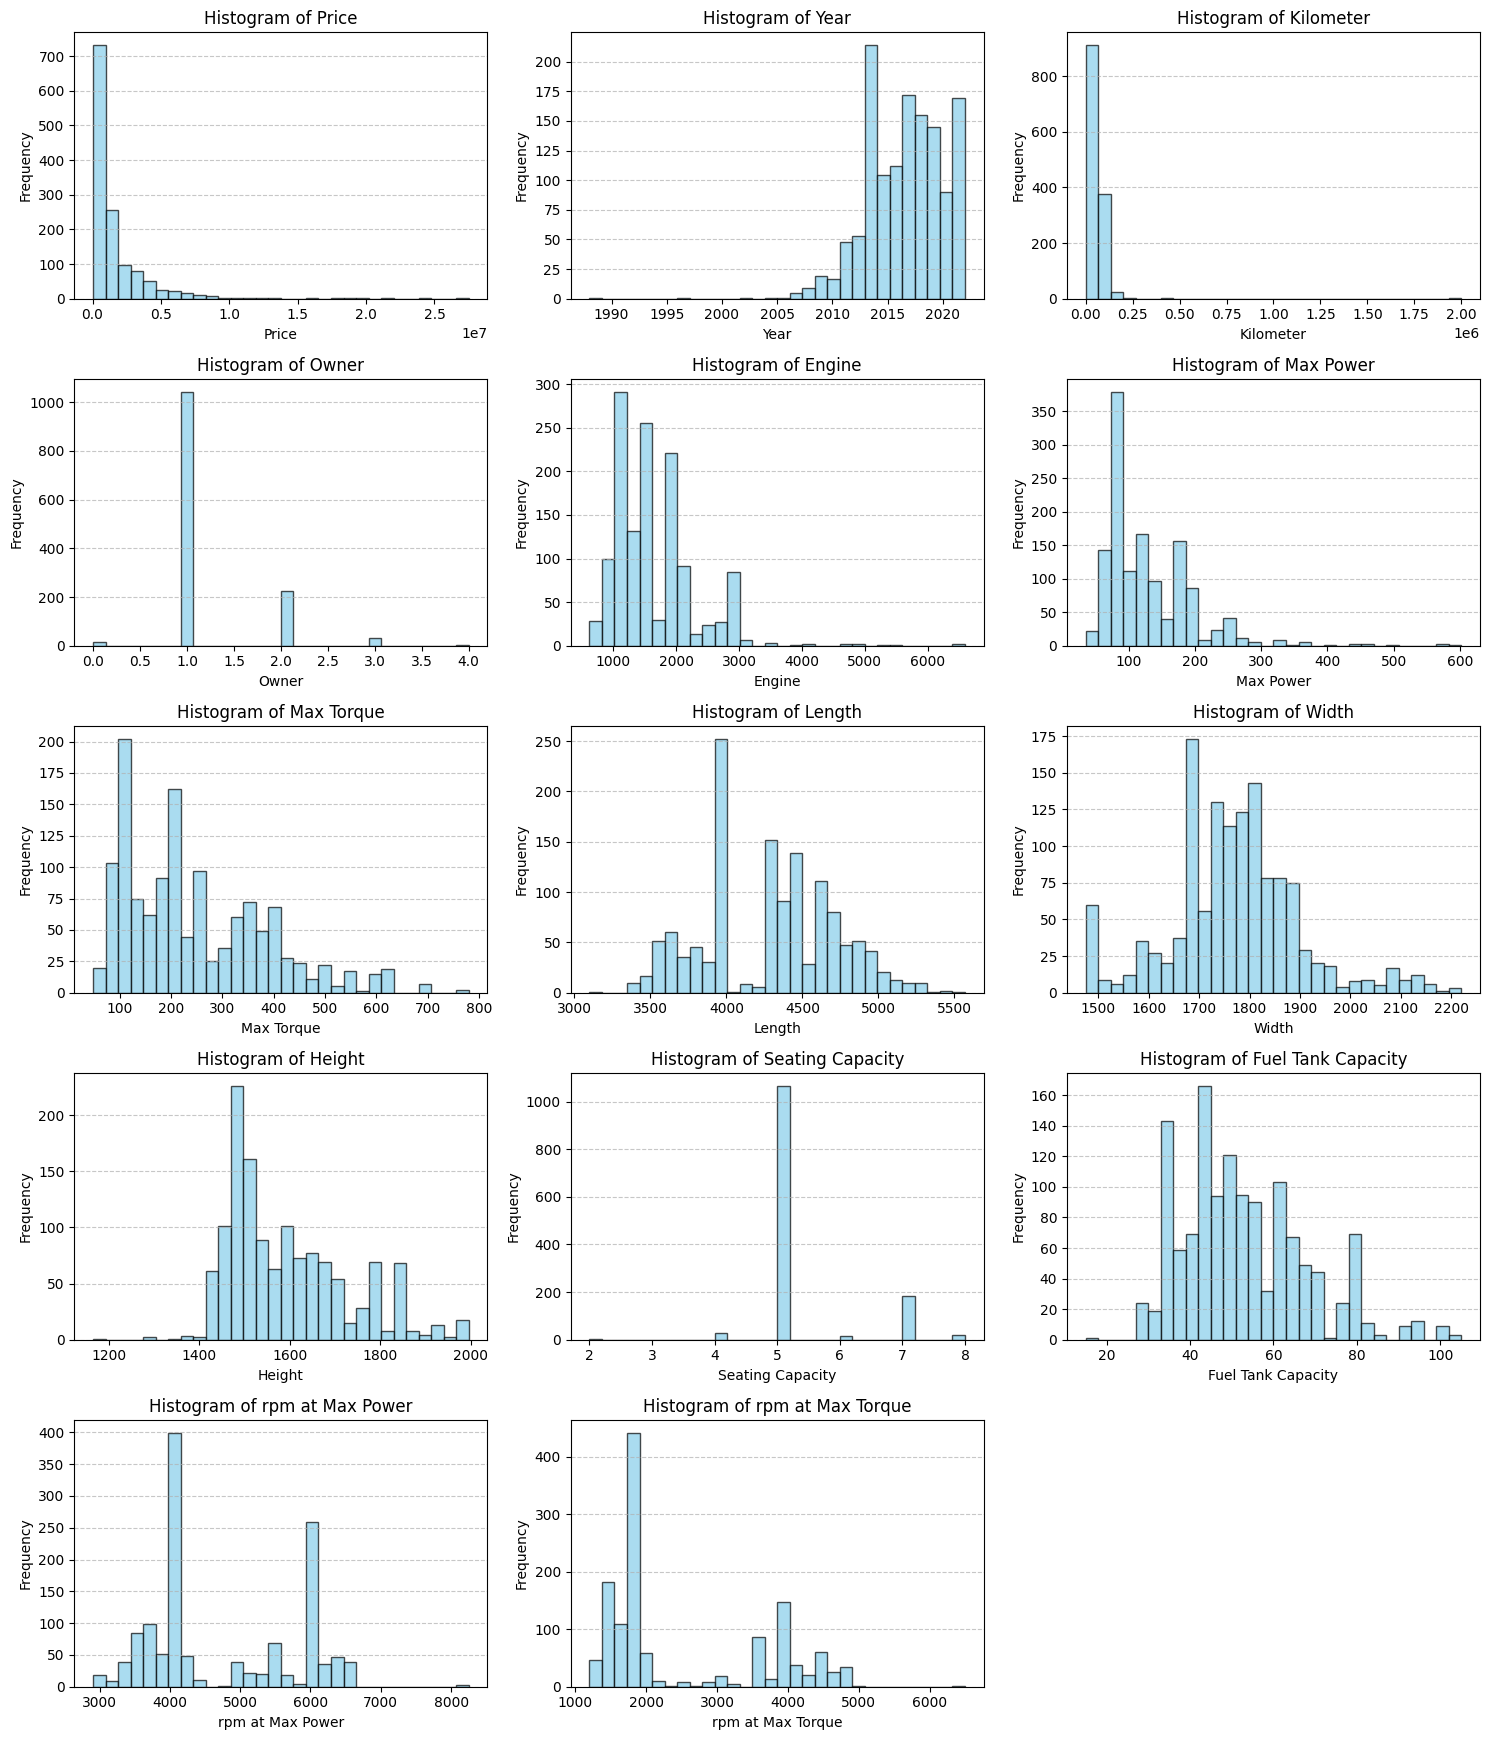

In [21]:
# 2. Plot the distribution of numeric columns
train_data.plot_distribution_of_numeric_columns()

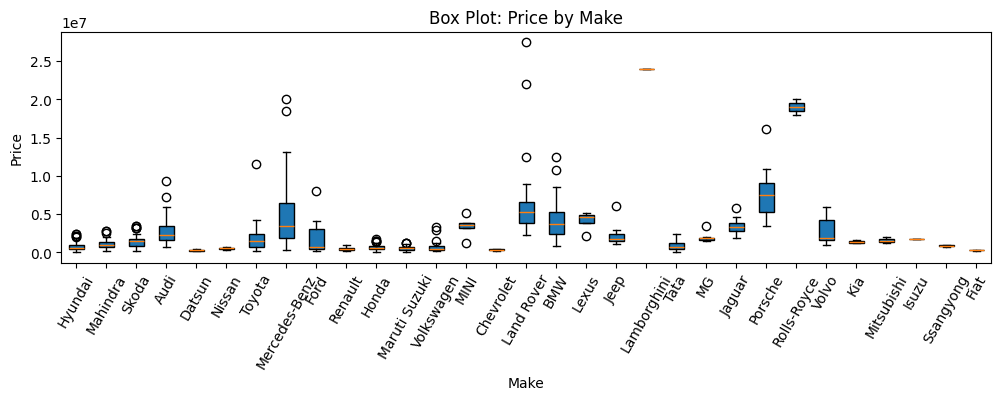

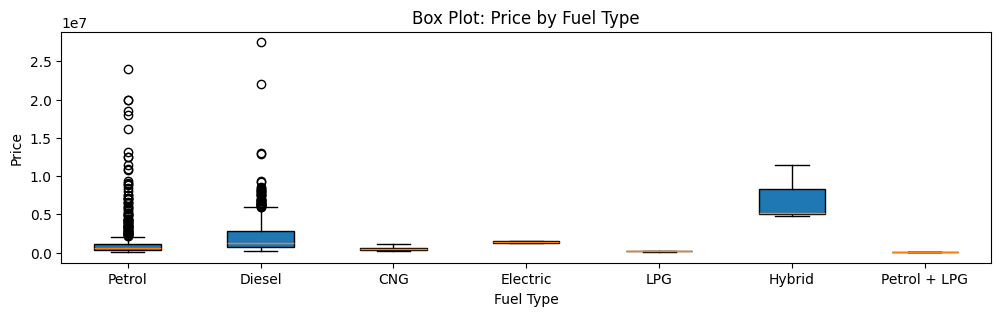

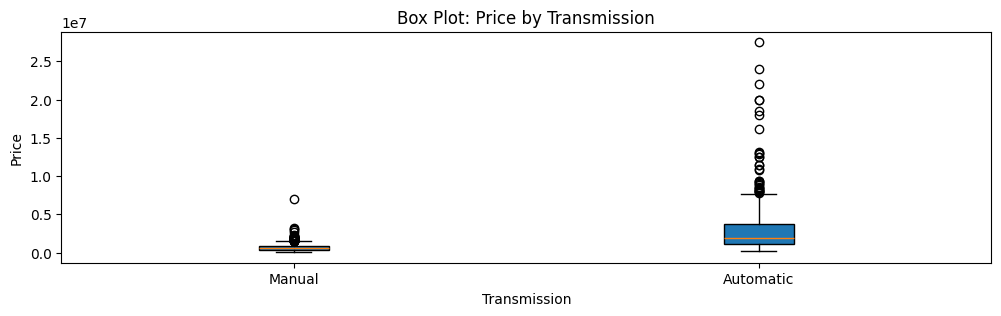

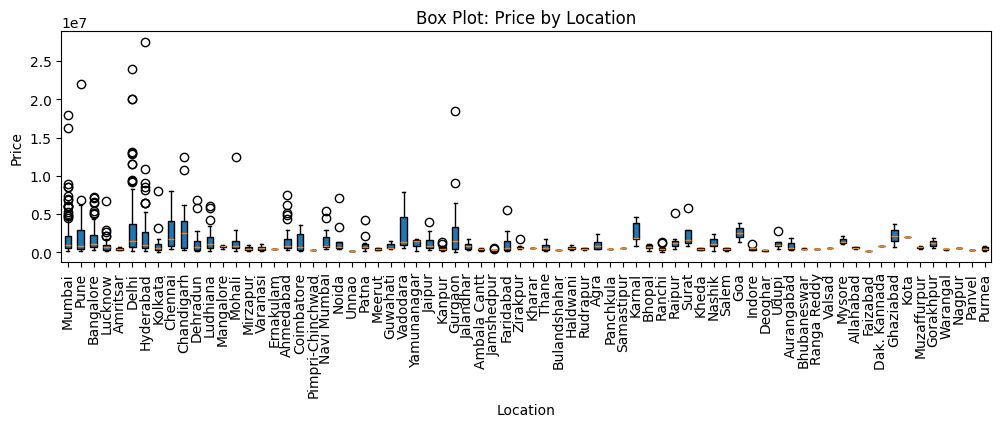

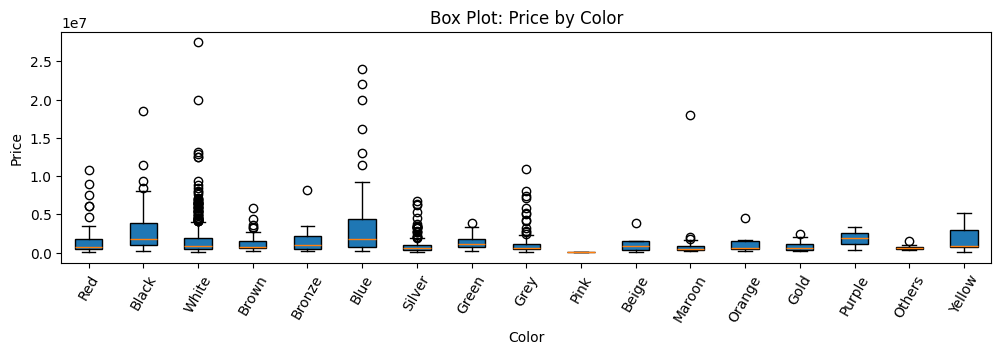

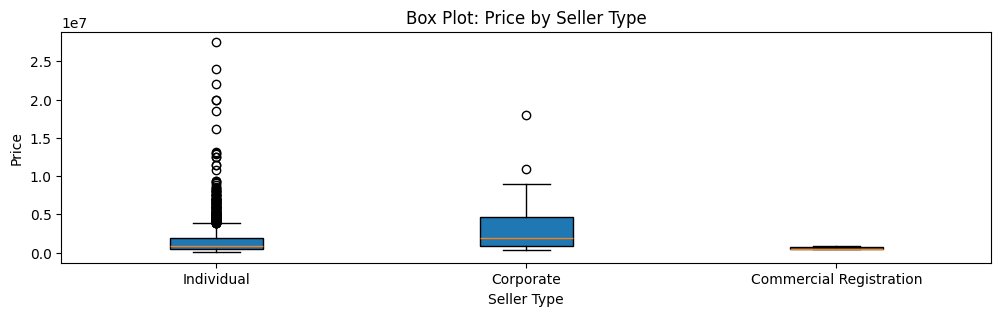

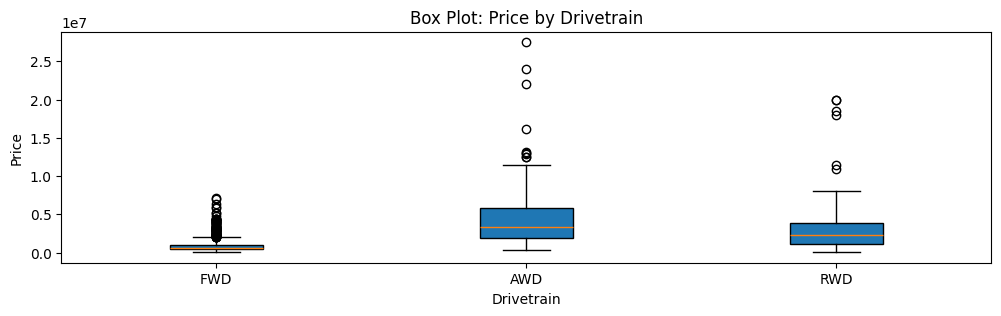

In [22]:
# 3. Box plot: Relationship between Price and Object Columns
train_data.box_plot_for_object_columns()

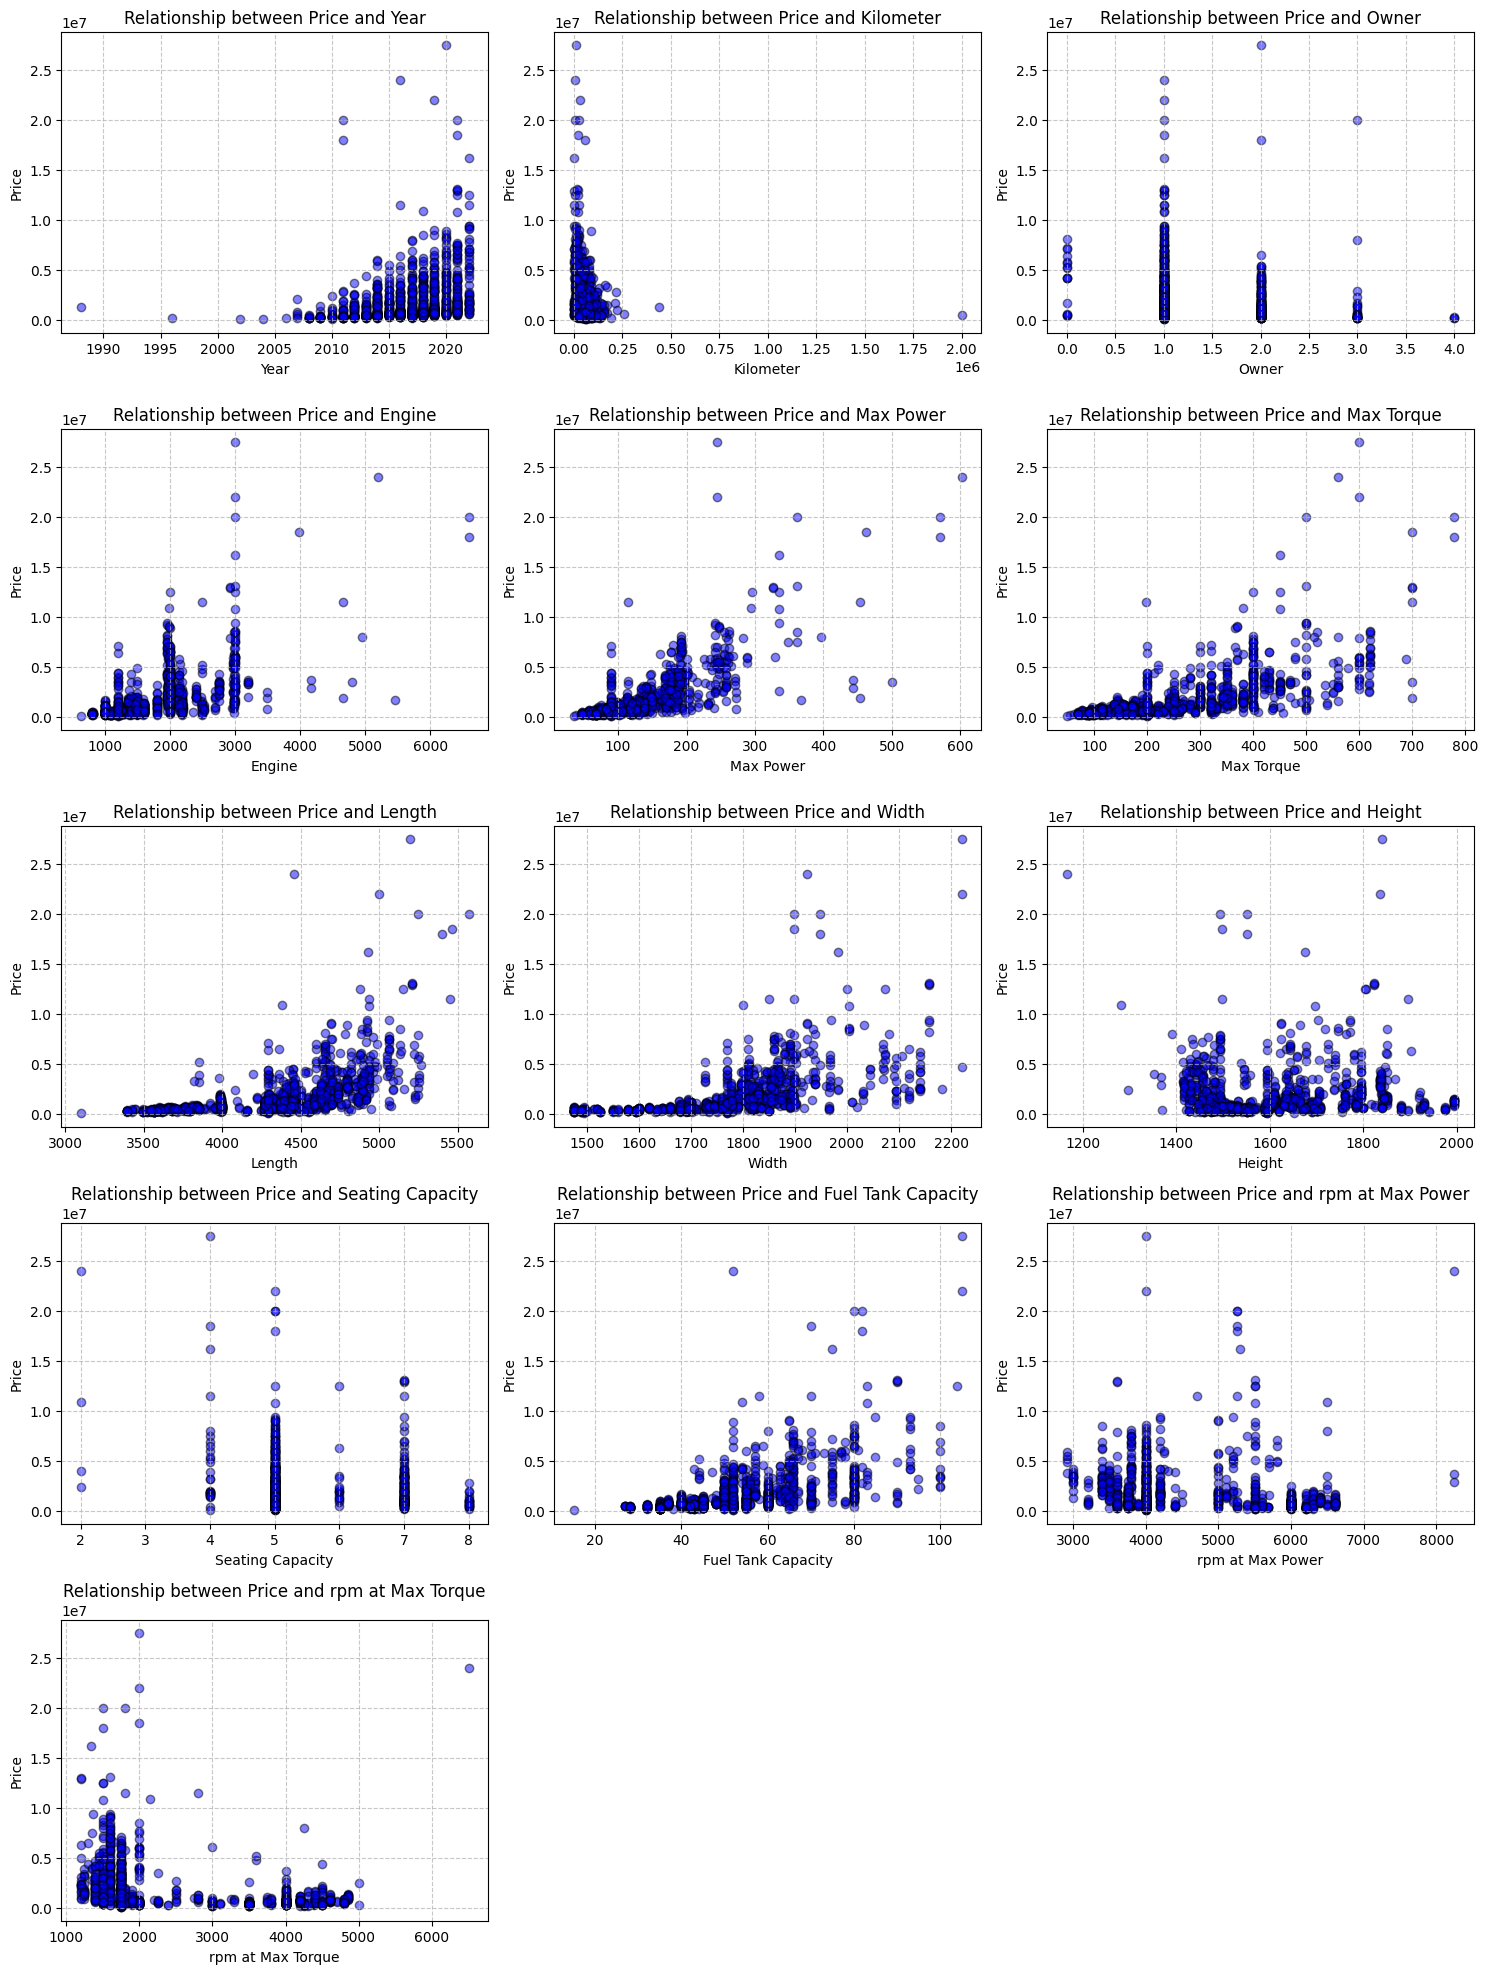

In [23]:
# 4. Scatter Plot: Relationship between Price and Numeric Columns
train_data.scatter_plot_for_numeric_columns()

## Part IV: Data Encoding and Data Normalization

#### IV.1: Train set and Validation set
We will use train data and validation data (after preprocessing)
- train_data_after_preprocessing
- validation_data_after_preprocessing

In [24]:
train_data = copy.deepcopy(train_data_after_preprocessing) # after preprocessing
numeric_columns, object_columns = train_data.unique_values()
print()
validation_data = copy.deepcopy(validation_data_after_preprocessing) # after preprocessing
numeric_columns, object_columns = validation_data.unique_values()

Object Columns and number of unique values: 8
[('Make', 31), ('Model', 912), ('Fuel Type', 7), ('Transmission', 2), ('Location', 72), ('Color', 17), ('Seller Type', 3), ('Drivetrain', 3)]

Numeric Columns and number of unique values: 14
[('Price', 507), ('Year', 21), ('Kilometer', 595), ('Owner', 5), ('Engine', 100), ('Max Power', 155), ('Max Torque', 128), ('Length', 229), ('Width', 159), ('Height', 185), ('Seating Capacity', 6), ('Fuel Tank Capacity', 50), ('rpm at Max Power', 36), ('rpm at Max Torque', 45)]

Object Columns and number of unique values: 8
[('Make', 22), ('Model', 215), ('Fuel Type', 5), ('Transmission', 2), ('Location', 51), ('Color', 15), ('Seller Type', 3), ('Drivetrain', 3)]

Numeric Columns and number of unique values: 14
[('Price', 228), ('Year', 16), ('Kilometer', 209), ('Owner', 5), ('Engine', 53), ('Max Power', 76), ('Max Torque', 72), ('Length', 103), ('Width', 80), ('Height', 86), ('Seating Capacity', 5), ('Fuel Tank Capacity', 36), ('rpm at Max Power', 25),

#### IV.2: Data Encoding

In [25]:
# Encode the training data
encoding_information = train_data.encode_data()
print("Data encoding completed!")
train_data.get_column_after_transform_info()

Data encoding completed!

Information about the columns:


Column Name                            Description Data Type  \
0                 Make                                Hãng xe   float64   
1                Model                                 Mẫu xe   float64   
2                Price                           Giá xe (VNĐ)     int64   
3                 Year                           Năm sản xuất     int64   
4            Kilometer                            Số km đã đi     int64   
5            Fuel Type                        Loại nhiên liệu     int64   
6         Transmission                                 Hộp số     int64   
7             Location                           Địa điểm bán     int64   
8                Color                                 Màu xe     int64   
9                Owner                 Số chủ sở hữu trước đó     int64   
10         Seller Type                         Loại người bán     int64   
11              Engine                 Dung tích động cơ (cc)   float64   
12           Max Power                 Công suất tối đa (bhp)     int64   
13          Max Torque                Mô-men xoắn tối đa (Nm)     int64   
14          Drivetrain                            Hệ dẫn động     int64   
15              Length                      Chiều dài xe (mm)   float64   
16               Width                     Chiều rộng xe (mm)   float64   
17              Height                      Chiều cao xe (mm)   float64   
18    Seating Capacity                            Số chỗ ngồi     int64   
19  Fuel Tank Capacity        Dung tích bình nhiên liệu (lít)     int64   
20    rpm at Max Power    Vòng tua tại Công suất tối đa (rpm)     int64   
21   rpm at Max Torque  Vòng tua tại Mô-men xoắn tối đa (rpm)     int64   

    Number of NaN  Unique Values  Most Frequent Value  
0               0             31             540000.0  
1               0            511             425000.0  
2               0            507             425000.0  
3               0             21               2017.0  
4               0            595              65000.0  
5               0              2                  0.0  
6               0              2                  0.0  
7               0              2                  1.0  
8               0              2                  0.0  
9               0              5                  1.0  
10              0              2                  0.0  
11              0            100               1197.0  
12              0            155                 89.0  
13              0            128                200.0  
14              0              3                  1.0  
15              0            229               3995.0  
16              0            159               1695.0  
17              0            185               1475.0  
18              0              6                  5.0  
19              0             50                 35.0  
20              0             36               4000.0  
21              0             45               1750.0

In [26]:
# Encode the validation data
validation_data.encode_data_test_set(encoding_information)
print("Data encoding completed!")
validation_data.get_column_after_transform_info()

Data encoding completed!

Information about the columns:


Column Name                            Description Data Type  \
0                 Make                                Hãng xe   float64   
1                Model                                 Mẫu xe   float64   
2                Price                           Giá xe (VNĐ)     int64   
3                 Year                           Năm sản xuất     int64   
4            Kilometer                            Số km đã đi     int64   
5            Fuel Type                        Loại nhiên liệu     int64   
6         Transmission                                 Hộp số     int64   
7             Location                           Địa điểm bán     int64   
8                Color                                 Màu xe     int64   
9                Owner                 Số chủ sở hữu trước đó     int64   
10         Seller Type                         Loại người bán     int64   
11              Engine                 Dung tích động cơ (cc)   float64   
12           Max Power                 Công suất tối đa (bhp)     int64   
13          Max Torque                Mô-men xoắn tối đa (Nm)     int64   
14          Drivetrain                            Hệ dẫn động     int64   
15              Length                      Chiều dài xe (mm)   float64   
16               Width                     Chiều rộng xe (mm)   float64   
17              Height                      Chiều cao xe (mm)   float64   
18    Seating Capacity                            Số chỗ ngồi     int64   
19  Fuel Tank Capacity        Dung tích bình nhiên liệu (lít)     int64   
20    rpm at Max Power    Vòng tua tại Công suất tối đa (rpm)     int64   
21   rpm at Max Torque  Vòng tua tại Mô-men xoắn tối đa (rpm)     int64   

    Number of NaN  Unique Values  Most Frequent Value  
0               0             22             540000.0  
1               0            185            4187500.0  
2               0            228             450000.0  
3               0             16               2018.0  
4               0            209              45000.0  
5               0              1                  0.0  
6               0              2                  0.0  
7               0              2                  1.0  
8               0              2                  0.0  
9               0              5                  1.0  
10              0              2                  0.0  
11              0             53               1197.0  
12              0             76                 89.0  
13              0             72                200.0  
14              0              3                  1.0  
15              0            103               3995.0  
16              0             80               1695.0  
17              0             86               1475.0  
18              0              5                  5.0  
19              0             36                 35.0  
20              0             25               4000.0  
21              0             26               1750.0

In [27]:
# Create save point: after encoding
train_data_after_encoding = copy.deepcopy(train_data)
validation_data_after_encoding = copy.deepcopy(validation_data)

#### IV.3: Data Normalization

##### Training set normalization

In [28]:
train_data = copy.deepcopy(train_data_after_encoding)
train_data.data.describe()

Make         Model         Price         Year     Kilometer  \
count  1.317000e+03  1.317000e+03  1.317000e+03  1317.000000  1.317000e+03   
mean   1.441297e+06  1.713934e+06  1.715538e+06  2016.511769  5.388879e+04   
std    1.573980e+06  2.406038e+06  2.415015e+06     3.442214  6.371596e+04   
min    2.700000e+05  4.900000e+04  4.900000e+04  1988.000000  0.000000e+00   
25%    5.500000e+05  4.950000e+05  4.950000e+05  2014.000000  2.723900e+04   
50%    6.400000e+05  8.250000e+05  8.400000e+05  2017.000000  4.806900e+04   
75%    1.875000e+06  1.900000e+06  1.875000e+06  2019.000000  7.200000e+04   
max    2.400000e+07  2.750000e+07  2.750000e+07  2022.000000  2.000000e+06   

         Fuel Type  Transmission     Location        Color        Owner  ...  \
count  1317.000000   1317.000000  1317.000000  1317.000000  1317.000000  ...   
mean      0.002278      0.458618     0.645406     0.171602     1.211845  ...   
std       0.047691      0.498474     0.478572     0.377177     0.500680  ...   
min       0.000000      0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000      0.000000     0.000000     0.000000     1.000000  ...   
50%       0.000000      0.000000     1.000000     0.000000     1.000000  ...   
75%       0.000000      1.000000     1.000000     0.000000     1.000000  ...   
max       1.000000      1.000000     1.000000     1.000000     4.000000  ...   

         Max Power   Max Torque   Drivetrain       Length        Width  \
count  1317.000000  1317.000000  1317.000000  1317.000000  1317.000000   
mean    129.141989   245.744115     1.419894  4292.656036  1769.743356   
std      65.632603   138.887265     0.715014   437.434286   130.388166   
min      35.000000    48.000000     1.000000  3099.000000  1475.000000   
25%      84.000000   130.000000     1.000000  3993.000000  1695.000000   
50%     113.000000   200.000000     1.000000  4315.000000  1770.000000   
75%     169.000000   343.000000     2.000000  4629.000000  1831.000000   
max     602.000000   780.000000     3.000000  5569.000000  2220.000000   

            Height  Seating Capacity  Fuel Tank Capacity  rpm at Max Power  \
count  1317.000000       1317.000000         1317.000000       1317.000000   
mean   1593.827639          5.303721           52.241458       4719.810175   
std     134.538895          0.816114           14.916159       1063.680445   
min    1165.000000          2.000000           15.000000       2910.000000   
25%    1485.000000          5.000000           42.000000       4000.000000   
50%    1555.000000          5.000000           50.000000       4000.000000   
75%    1672.000000          5.000000           60.000000       6000.000000   
max    1995.000000          8.000000          105.000000       8250.000000   

       rpm at Max Torque  
count        1317.000000  
mean         2501.594533  
std          1164.047523  
min          1200.000000  
25%          1600.000000  
50%          1750.000000  
75%          3800.000000  
max          6500.000000  

[8 rows x 22 columns]

In [29]:
range_vals, min_vals, max_vals = train_data.normalize_data()
train_data_after_normalization = copy.deepcopy(train_data) # after normalization
print("Data normalization completed!")
train_data_after_normalization.data.describe()

Data normalization completed!


Make        Model         Price         Year    Kilometer  \
count  1317.000000  1317.000000  1.317000e+03  1317.000000  1317.000000   
mean      0.049359     0.060651  1.715538e+06     0.838581     0.730013   
std       0.066329     0.087648  2.415015e+06     0.101242     0.066248   
min       0.000000     0.000000  4.900000e+04     0.000000     0.000000   
25%       0.011799     0.016247  4.950000e+05     0.764706     0.703886   
50%       0.015592     0.028269  8.400000e+05     0.852941     0.743033   
75%       0.067636     0.067429  1.875000e+06     0.911765     0.770880   
max       1.000000     1.000000  2.750000e+07     1.000000     1.000000   

         Fuel Type  Transmission     Location        Color        Owner  ...  \
count  1317.000000   1317.000000  1317.000000  1317.000000  1317.000000  ...   
mean      0.002278      0.458618     0.645406     0.171602     0.302961  ...   
std       0.047691      0.498474     0.478572     0.377177     0.125170  ...   
min       0.000000      0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000      0.000000     0.000000     0.000000     0.250000  ...   
50%       0.000000      0.000000     1.000000     0.000000     0.250000  ...   
75%       0.000000      1.000000     1.000000     0.000000     0.250000  ...   
max       1.000000      1.000000     1.000000     1.000000     1.000000  ...   

         Max Power   Max Torque   Drivetrain       Length        Width  \
count  1317.000000  1317.000000  1317.000000  1317.000000  1317.000000   
mean      0.166035     0.270142     0.209947     0.483262     0.395629   
std       0.115754     0.189737     0.357507     0.177099     0.175018   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.086420     0.112022     0.000000     0.361943     0.295302   
50%       0.137566     0.207650     0.000000     0.492308     0.395973   
75%       0.236332     0.403005     0.500000     0.619433     0.477852   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Height  Seating Capacity  Fuel Tank Capacity  rpm at Max Power  \
count  1317.000000       1317.000000         1317.000000       1317.000000   
mean      0.516660          0.550620            0.413794          0.338916   
std       0.162095          0.136019            0.165735          0.199191   
min       0.000000          0.000000            0.000000          0.000000   
25%       0.385542          0.500000            0.300000          0.204120   
50%       0.469880          0.500000            0.388889          0.204120   
75%       0.610843          0.500000            0.500000          0.578652   
max       1.000000          1.000000            1.000000          1.000000   

       rpm at Max Torque  
count        1317.000000  
mean            0.245584  
std             0.219632  
min             0.000000  
25%             0.075472  
50%             0.103774  
75%             0.490566  
max             1.000000  

[8 rows x 22 columns]

In [30]:
range_vals, min_vals, max_vals
# print range_vals, min_vals, max_vals  size
print(range_vals.size, min_vals.size, max_vals.size)

21 21 21


##### Validation set normalization

In [31]:
validation_data = copy.deepcopy(validation_data_after_encoding)
print("Data normalization completed!")
validation_data.data.describe()
validation_data.data

Data normalization completed!


Make       Model     Price  Year  Kilometer  Fuel Type  \
0    3725000.0   4187500.0   2199000  2016      77000          0   
1    3395000.0   7475000.0   5200000  2020      18000          0   
2    5237500.0  22000000.0  19300000  2019      63000          0   
3    1875000.0   1660500.0   1725000  2019      23952          0   
4     422500.0    375000.0    395000  2018      75500          0   
..         ...         ...       ...   ...        ...        ...   
325   640000.0   1260000.0   1000000  2018      42000          0   
326   540000.0    785000.0    825000  2019      25500          0   
327  3725000.0   4187500.0   2800000  2017      29000          0   
328  3725000.0   1689999.0   4390000  2020      23000          0   
329   540000.0    535000.0    422000  2018      12768          0   

     Transmission  Location  Color  Owner  ...  Max Power  Max Torque  \
0               1         1      1      1  ...        184         350   
1               1         0      0      1  ...        192         400   
2               1         1      1      1  ...        244         600   
3               0         1      0      1  ...        169         350   
4               0         1      1      1  ...         67          91   
..            ...       ...    ...    ...  ...        ...         ...   
325             1         0      0      1  ...        122         154   
326             0         0      0      1  ...         89         200   
327             1         1      0      2  ...        184         350   
328             1         1      0      1  ...        188         400   
329             0         0      0      1  ...         73         101   

     Drivetrain  Length   Width  Height  Seating Capacity  Fuel Tank Capacity  \
0             2  4454.0  2044.0  1545.0                 5                  63   
1             2  5063.0  1860.0  1494.0                 5                  80   
2             3  4999.0  2220.0  1835.0                 5                 105   
3             1  4655.0  1835.0  1760.0                 5                  60   
4             1  3679.0  1579.0  1478.0                 5                  28   
..          ...     ...     ...     ...               ...                 ...   
325           1  4270.0  1780.0  1630.0                 5                  60   
326           1  3995.0  1790.0  1640.0                 5                  48   
327           2  4454.0  2044.0  1545.0                 5                  63   
328           2  4633.0  1811.0  1429.0                 5                  57   
329           2  3675.0  1475.0  1800.0                 5                  40   

     rpm at Max Power  rpm at Max Torque  
0                4000               1750  
1                3800               1600  
2                4000               2000  
3                3750               1750  
4                5500               4250  
..                ...                ...  
325              6400               4850  
326              4000               1750  
327              4000               1750  
328              4000               1750  
329              6000               3000  

[330 rows x 22 columns]

In [32]:
validation_data.normalize_data_test_set(range_vals, min_vals)
validation_data_after_normalization = copy.deepcopy(validation_data) # after normalization
validation_data_after_normalization.data.describe()

Make       Model         Price        Year   Kilometer  \
count  330.000000  330.000000  3.300000e+02  330.000000  330.000000   
mean     0.050903    0.058647  1.621294e+06    0.825045    0.740749   
std      0.065972    0.082483  2.131653e+06    0.089524    0.045727   
min      0.003350    0.003861  1.200000e+05    0.529412    0.568615   
25%      0.011378    0.014608  4.352492e+05    0.764706    0.721225   
50%      0.015592    0.028269  7.975000e+05    0.852941    0.750546   
75%      0.082912    0.074624  2.187500e+06    0.882353    0.770880   
max      0.789296    0.799643  2.000000e+07    1.000000    0.839551   

       Fuel Type  Transmission    Location       Color       Owner  ...  \
count      330.0    330.000000  330.000000  330.000000  330.000000  ...   
mean         0.0      0.430303    0.690909    0.178788    0.311364  ...   
std          0.0      0.495870    0.462821    0.383756    0.131566  ...   
min          0.0      0.000000    0.000000    0.000000    0.000000  ...   
25%          0.0      0.000000    0.000000    0.000000    0.250000  ...   
50%          0.0      0.000000    1.000000    0.000000    0.250000  ...   
75%          0.0      1.000000    1.000000    0.000000    0.250000  ...   
max          0.0      1.000000    1.000000    1.000000    1.250000  ...   

        Max Power  Max Torque  Drivetrain      Length       Width      Height  \
count  330.000000  330.000000  330.000000  330.000000  330.000000  330.000000   
mean     0.158463    0.262552    0.212121    0.461148    0.381318    0.508251   
std      0.107260    0.192829    0.355809    0.183472    0.203180    0.160054   
min      0.007055    0.008197    0.000000    0.119838    0.000000    0.272289   
25%      0.082892    0.090164    0.000000    0.304049    0.295302    0.378614   
50%      0.141975    0.207650    0.000000    0.503441    0.389262    0.457831   
75%      0.239418    0.412568    0.500000    0.604960    0.477852    0.608735   
max      0.943563    1.000000    1.000000    1.000000    1.000000    1.000000   

       Seating Capacity  Fuel Tank Capacity  rpm at Max Power  \
count        330.000000          330.000000        330.000000   
mean           0.547980            0.407946          0.336882   
std            0.126540            0.169188          0.203392   
min            0.333333            0.144444          0.000000   
25%            0.500000            0.300000          0.204120   
50%            0.500000            0.388889          0.204120   
75%            0.500000            0.500000          0.578652   
max            1.000000            1.000000          0.691011   

       rpm at Max Torque  
count         330.000000  
mean            0.253292  
std             0.223686  
min             0.000000  
25%             0.103774  
50%             0.103774  
75%             0.528302  
max             0.688679  

[8 rows x 22 columns]

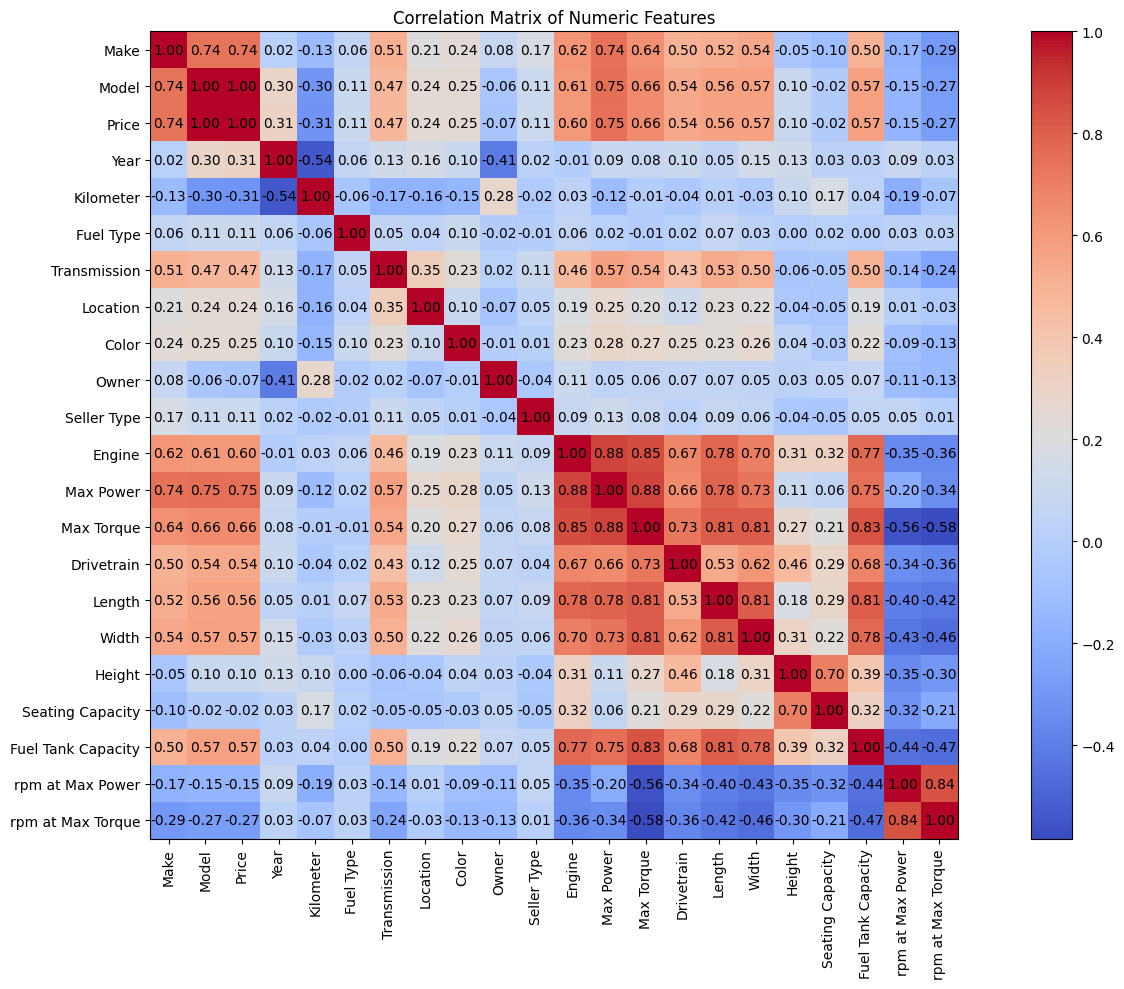

In [33]:
train_data_after_normalization.plot_corr_matrix(15, 10)

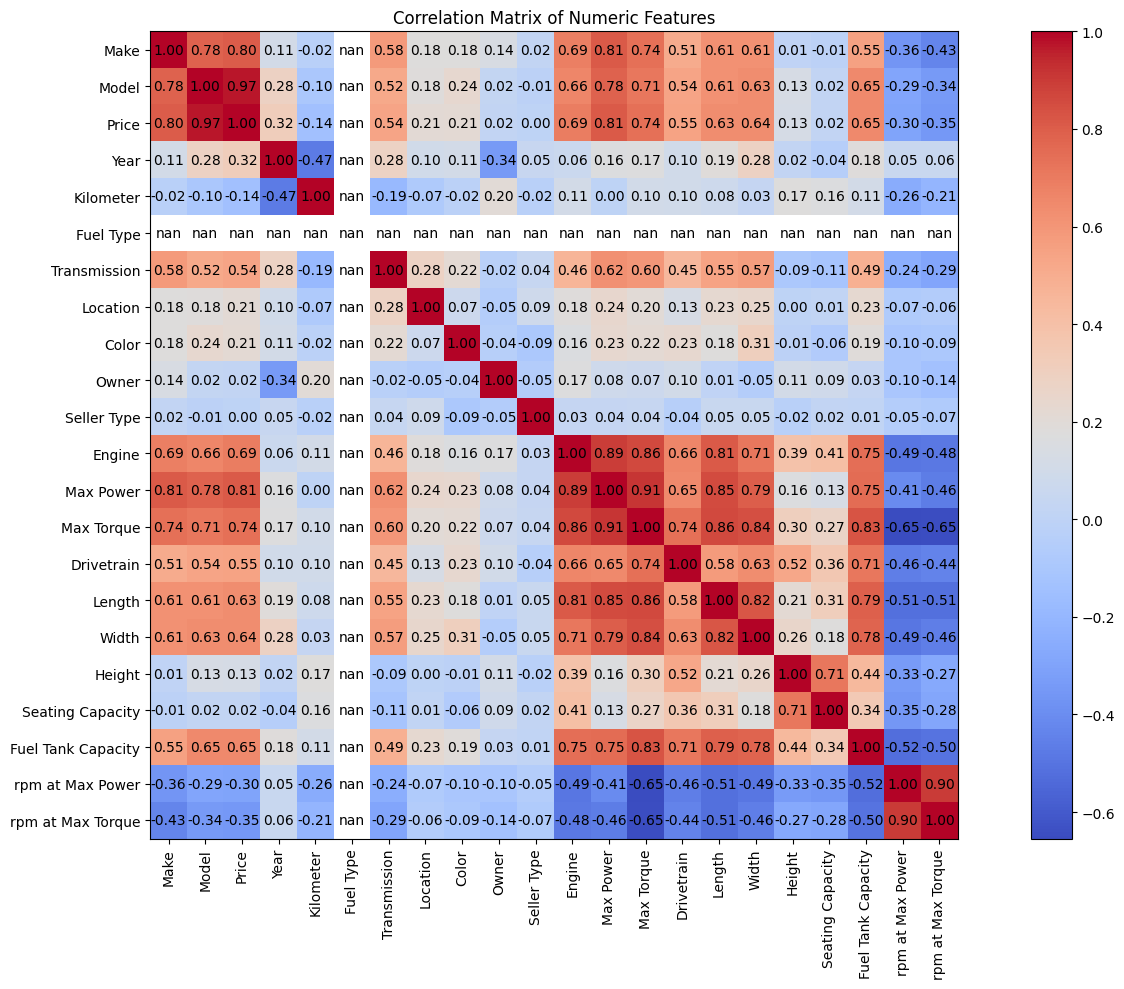

In [34]:
validation_data_after_normalization.plot_corr_matrix(15, 10)

## Part V: Split dataset and tools to evaluate models

#### V.1: Split dataset
Split training set into X_train and y_train. Split validation set into X_val and y_val.

In [35]:
train_data = copy.deepcopy(train_data_after_normalization)
validation_data = copy.deepcopy(validation_data_after_normalization)
numeric_columns, object_columns = train_data.numeric_columns, train_data.object_columns
print(numeric_columns, len(numeric_columns))

train_data = train_data.data
validation_data = validation_data.data

# X_train, y_train from train_data
# X_val, y_val from validation_data

X_train = train_data.drop(columns=['Price'])
y_train = train_data['Price']

X_val = validation_data.drop(columns=['Price'])
y_val = validation_data['Price']

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'rpm at Max Power',
       'rpm at Max Torque'],
      dtype='object') 22


#### V.2: Tools to evaluate the models

In [36]:
# Function to evaluate the model
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2_score(y_true, y_pred):
    SSE = np.sum((y_true - y_pred) ** 2)
    SST = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (SSE / SST) # R^2 = 1 - SSE/SST = SSR/SST

def evaluate_model(y_true, y_pred):
    model_eval = pd.DataFrame({
        'Metric': ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2 Score'],
        'Value': [mse(y_true, y_pred), rmse(y_true, y_pred), mae(y_true, y_pred), r2_score(y_true, y_pred)]
    })
    return model_eval

## Part VI: Simple Linear Regression model from Statistics's point of view

Based on Correlation coefficient map, **Model** maybe the best feature for model. We will prove it.

In [37]:
# Y = beta0 + beta1*X
# beta1 = Sxx / Sxy
# beta0 = mean(Y) - beta1 * mean(X)
# Sxx = sum((X - mean(X))^2)
# Sxy = sum((X - mean(X)) * (Y - mean(Y)))

def simple_linear_regression(X, y):
    mean_X = np.mean(X)
    mean_y = np.mean(y)
    Sxx = np.sum((X - mean_X) ** 2)
    Sxy = np.sum((X - mean_X) * (y - mean_y))
    beta1 = Sxy / Sxx
    beta0 = mean_y - beta1 * mean_X
    return beta0, beta1

result = []

for F in numeric_columns.drop(['Price']):
    # Predict the price of a car based on feature F
    beta0, beta1 = simple_linear_regression(X_train[F], y_train)
    # print(f"{F} feature: Price = {beta0:.2f} + {beta1:.2f} * {F}")

    # Predict the price of a car based on feature F
    y_pred = beta0 + beta1 * X_train[F]

    # Evaluate the model on train set
    model_eval = evaluate_model(y_train, y_pred)
    result.append([F, model_eval, beta0, beta1])

Metric = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2 Score']

for i, metric in enumerate(Metric):
    best = result[0]
    for res in result:
        if (res[1].iloc[i, 1] < best[1].iloc[i, 1] and metric != 'R^2 Score') or \
           (res[1].iloc[i, 1] > best[1].iloc[i, 1] and metric == 'R^2 Score'):
            best = res
    print(f"Best feature for {metric}: {best[0]}. Value: {best[1].iloc[i, 1]}")

print(f"\nConclusion: {best[0]} is the best feature for all metrics")
# => Max Power (best[0]) is the best feature for all metrics
id_BestFeature_in_result = [i for i in range(len(result)) if result[i][0] == best[0]][0]

beta0 = result[id_BestFeature_in_result][2]
beta1 = result[id_BestFeature_in_result][3]
F = result[id_BestFeature_in_result][0]
print(f"\n{F} formula: Price = {beta0:.2f} + {beta1:.2f} * {F}")

print("\nEvaluation metrics on Training Set:")
result[id_BestFeature_in_result][1]

weight_simpleLR = [beta0, beta1]

Best feature for Mean Squared Error: Model. Value: 53227621675.572655
Best feature for Root Mean Squared Error: Model. Value: 230711.12169891736
Best feature for Mean Absolute Error: Model. Value: 75530.68845495502
Best feature for R^2 Score: Model. Value: 0.990866708096249

Conclusion: Model is the best feature for all metrics

Model formula: Price = 52041.63 + 27427303.62 * Model

Evaluation metrics on Training Set:


In [38]:
# Best model on training set:
print(f'Best feature: {result[id_BestFeature_in_result][0]}')
beta0 = result[id_BestFeature_in_result][2]
beta1 = result[id_BestFeature_in_result][3]

# Predict the price of a car based on the best feature (train set)
y_pred = (beta0 + beta1 * X_train[result[id_BestFeature_in_result][0]]).round().astype(int)
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df.head(10)

Best feature: Model


Actual  Predicted
0   150000     152954
1  1800000    1700616
2   551000     553608
3  1099000    1101135
4  7200000    7196869
5   335000     337795
6   315000     317812
7  1299000    1252005
8  1450000    1451832
9  8190000    9195142

In [39]:
print("\nEvaluation metrics on Validation Set:")
y_pred = beta0 + beta1 * X_val['Model']

model_eval = evaluate_model(y_val, y_pred)
model_eval


Evaluation metrics on Validation Set:


Metric         Value
0       Mean Squared Error  3.161781e+11
1  Root Mean Squared Error  5.622972e+05
2      Mean Absolute Error  2.984018e+05
3                R^2 Score  9.302062e-01

In [40]:
# Predict the price of a car based on the best feature (train set)
y_pred = (beta0 + beta1 * X_val[result[id_BestFeature_in_result][0]]).round().astype(int)
df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df.head(10)

Actual  Predicted
0   2199000    4186969
1   5200000    7471631
2  19300000   21984093
3   1725000    1662151
4    395000     377760
5    245000     252868
6    275000     237881
7    885000     894813
8    560000     452695
9   2650000    4186969

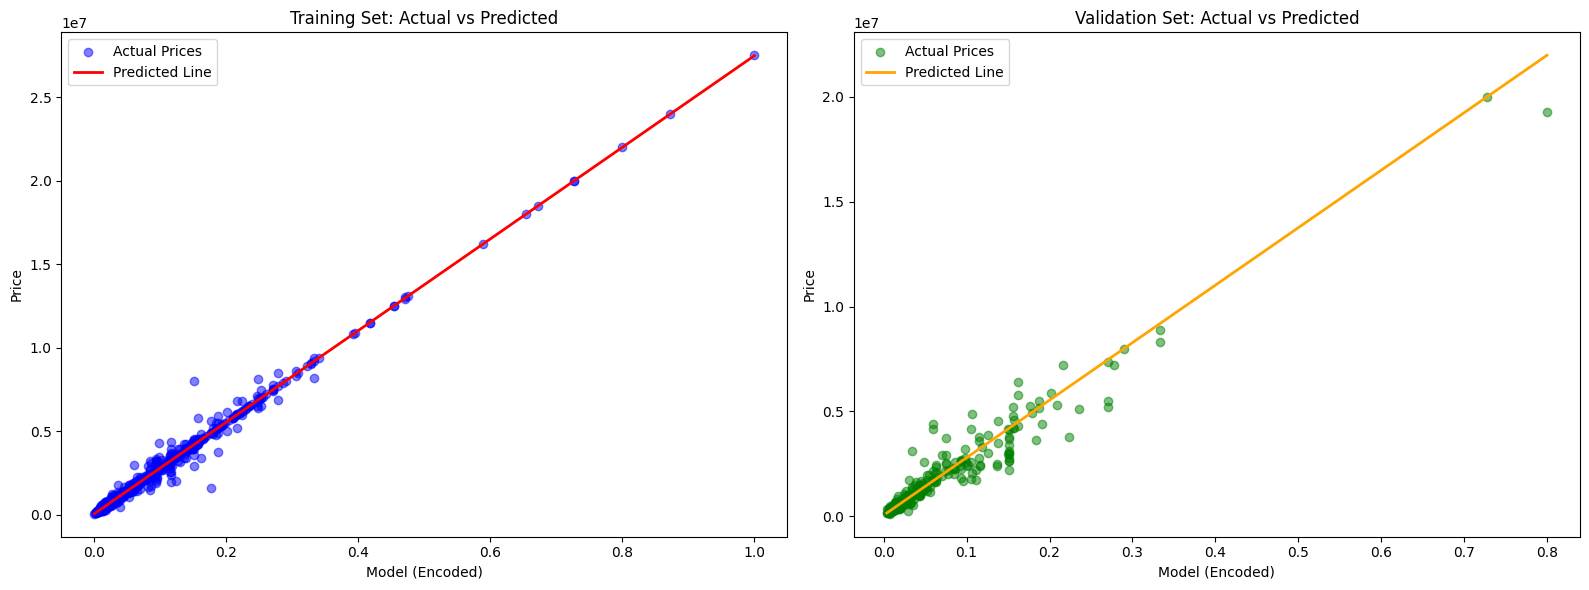

In [41]:
# Plot line of best fit

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set
axes[0].scatter(X_train['Model'], y_train, color='blue', alpha=0.5, label='Actual Prices')
sorted_idx_train = X_train['Model'].argsort()
X_sorted_train = X_train['Model'].iloc[sorted_idx_train]
y_line_train = beta0 + beta1 * X_sorted_train
axes[0].plot(X_sorted_train, y_line_train, color='red', linewidth=2, label='Predicted Line')
axes[0].set_xlabel("Model (Encoded)")
axes[0].set_ylabel("Price")
axes[0].set_title("Training Set: Actual vs Predicted")
axes[0].legend()

# Validation set
axes[1].scatter(X_val['Model'], y_val, color='green', alpha=0.5, label='Actual Prices')
sorted_idx_val = X_val['Model'].argsort()
X_sorted_val = X_val['Model'].iloc[sorted_idx_val]
y_line_val = beta0 + beta1 * X_sorted_val
axes[1].plot(X_sorted_val, y_line_val, color='orange', linewidth=2, label='Predicted Line')
axes[1].set_xlabel("Model (Encoded)")
axes[1].set_ylabel("Price")
axes[1].set_title("Validation Set: Actual vs Predicted")
axes[1].legend()

plt.tight_layout()
plt.show()

## Part VII: Multiple Linear Regression model

### VII.1 Build Model

In [42]:
class MultipleLinearRegression:
    def __init__(self, X_train, y_train, X_val, y_val):
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.thetas = np.zeros(self.X_train.shape[1])
        self.train_predictions = None
        self.val_predictions = None
        self.train_losses = []
        self.val_losses = []
        self.epochs = None

    def predict(self, X):
        """Make predictions for given input data"""
        return np.dot(X, self.thetas)

    def compute_loss(self, predictions, y, loss_fn=None, alpha=0):
        """Calculate loss"""
        mse = np.mean((y - predictions) ** 2)
        if loss_fn is None:
            return mse
        else:
            penalty = 0
            if loss_fn == 'lasso':
                penalty = np.sum(np.abs(self.thetas))
            elif loss_fn == 'ridge':
                penalty = np.sum(self.thetas ** 2)
            loss = mse + alpha * penalty
            return loss

    def gradient(self, X, predictions, y):
        """Compute gradients for weight updates"""
        return np.dot(X.T, (predictions - y)) / len(y)

    def gradient_lasso(self, X, predictions, y, alpha):
        """Compute gradients for weight updates"""
        n = len(y)
        mse_gradient = -(2 / n) * np.dot(X.T, (y - predictions))
        l1_gradient = alpha * np.sign(self.thetas)
        gradient = mse_gradient + l1_gradient
        return gradient

    def gradient_ridge(self, X, predictions, y, alpha):
        """Compute gradients for weight updates"""
        n = len(y)
        mse_gradient = -(2 / n) * np.dot(X.T, (y - predictions))
        l2_gradient = 2 * alpha * self.thetas
        gradient = mse_gradient + l2_gradient
        return gradient

    def update_weights(self, learning_rate, gradient):
        """Update model parameters"""
        return self.thetas - learning_rate * gradient

    def train(self, epochs, learning_rate, log_interval, loss_fn=None, alpha=0, logging=False):
        """Train the model"""
        self.epochs = epochs
        for epoch in range(epochs):
            self.train_predictions = self.predict(self.X_train)
            self.val_predictions = self.predict(self.X_val)

            if loss_fn == None:
                train_loss = self.compute_loss(self.train_predictions, self.y_train)
                val_loss = self.compute_loss(self.val_predictions, self.y_val)
                grad = self.gradient(self.X_train, self.train_predictions, self.y_train)
            elif loss_fn == 'lasso':
                train_loss = self.compute_loss(self.train_predictions, self.y_train, loss_fn, alpha)
                val_loss = self.compute_loss(self.val_predictions, self.y_val, loss_fn, alpha)
                grad = self.gradient_lasso(self.X_train, self.train_predictions, self.y_train, alpha)
            elif loss_fn == 'ridge':
                train_loss = self.compute_loss(self.train_predictions, self.y_train, loss_fn, alpha)
                val_loss = self.compute_loss(self.val_predictions, self.y_val, loss_fn, alpha)
                grad = self.gradient_ridge(self.X_train, self.train_predictions, self.y_train, alpha)

            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss)

            self.thetas = self.update_weights(learning_rate, grad)

            if epoch % log_interval == 0 and logging:
                print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    def get_parameters(self):
        """Return current model parameters"""
        return self.thetas

    def plot_losses(self):
        """Plot losses over epochs"""
        plt.figure(figsize=(12, 7), dpi=100)

        epochs = range(len(self.train_losses))

        plt.plot(epochs, self.train_losses,
                label='Training Loss',
                color='dodgerblue',
                linewidth=2.5,
                alpha=0.9)
        plt.fill_between(epochs, self.train_losses,
                        color='dodgerblue',
                        alpha=0.1)

        plt.plot(epochs, self.val_losses,
                label='Validation Loss',
                color='tomato',
                linewidth=2.5,
                alpha=0.9)
        plt.fill_between(epochs, self.val_losses,
                        color='tomato',
                        alpha=0.1)

        plt.xlabel('Epoch', fontsize=14, fontweight='bold', color='darkslategray')
        plt.ylabel('Loss (Log Scale)', fontsize=14, fontweight='bold', color='darkslategray')
        plt.title('Training and Validation Loss over Epochs',
                fontsize=16, fontweight='bold', color='navy', pad=20)

        plt.legend(fontsize=12, loc='upper right', frameon=True,
                facecolor='white', edgecolor='black', framealpha=0.9)

        plt.grid(True, linestyle='--', alpha=0.6, color='gray')

        plt.yscale('log')

        plt.xticks(fontsize=12, color='darkslategray')
        plt.yticks(fontsize=12, color='darkslategray')

        ax = plt.gca()
        ax.set_facecolor('#f7f7f7')
        for spine in ax.spines.values():
            spine.set_edgecolor('gray')
            spine.set_linewidth(0.8)

        plt.tight_layout()
        plt.show()

### VII.3 Prepare data

In [44]:
# Add bias
X_train_bias = np.hstack((np.ones(shape=(X_train.shape[0], 1)), X_train))
X_val_bias = np.hstack((np.ones(shape=(X_val.shape[0], 1)), X_val))

# Min-Max scaler
train_min = np.min(y_train)
train_max = np.max(y_train)

val_min = np.min(y_val)
val_max = np.max(y_val)

y_train_minmax = (y_train - train_min) / (train_max - train_min)
y_val_minmax = (y_val - val_min) / (val_max - val_min)

# Standardization
train_mean = np.mean(y_train)
train_std = np.std(y_train)
val_mean = np.mean(y_val)
val_std = np.std(y_val)

y_train_standardized = (y_train - train_mean) / train_std
y_val_standardized = (y_val - val_mean) / val_std

In [45]:
# List to record results
evaluations = []
evaluations_label_normalized = []

In [46]:
# Models dictionary
models = {}

We will experimenting different methods to find out which one works out the best. Base model is using all features and no bias. Next models are built to be expected to outperform this one.

### VII.4 Training

#### Model architecture

##### Base

In [47]:
epochs = 5000
learning_rate = 0.1
log_interval = epochs / 10

In [48]:
multiLR = MultipleLinearRegression(X_train_bias, y_train, X_val_bias, y_val)
multiLR.train(epochs, learning_rate, log_interval, logging=True)
models['Base'] = multiLR

Epoch: 0 | Train Loss: 8770939870486.0029 | Val Loss: 7158767474066.7090
Epoch: 500 | Train Loss: 1543387772420.4773 | Val Loss: 1037569582241.6879
Epoch: 1000 | Train Loss: 1017448429957.8683 | Val Loss: 666585065699.7168
Epoch: 1500 | Train Loss: 734830704096.5391 | Val Loss: 476300555155.6445
Epoch: 2000 | Train Loss: 557288964010.3594 | Val Loss: 368247427526.1935
Epoch: 2500 | Train Loss: 437280219000.4886 | Val Loss: 304716013469.3517
Epoch: 3000 | Train Loss: 352300741849.2529 | Val Loss: 266747110497.9500
Epoch: 3500 | Train Loss: 290151775636.1526 | Val Loss: 244127110039.2547
Epoch: 4000 | Train Loss: 243619931525.5351 | Val Loss: 231078476265.2769
Epoch: 4500 | Train Loss: 208148548565.1751 | Val Loss: 224166340724.2166


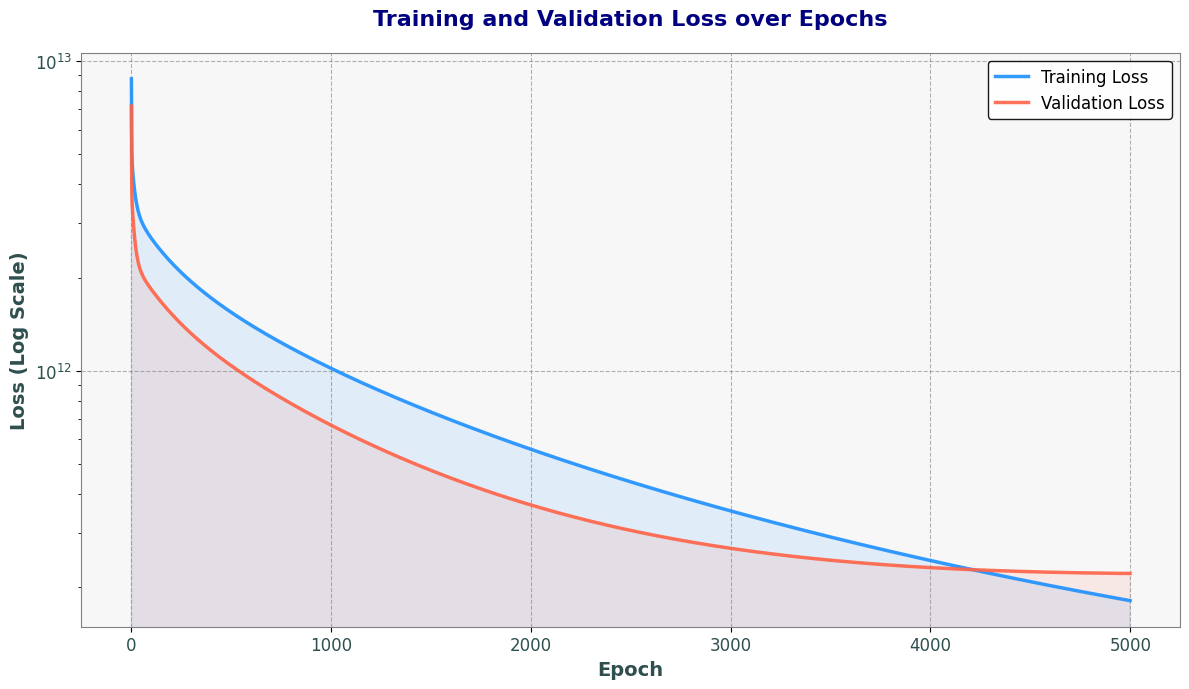

In [49]:
multiLR.plot_losses()

In [50]:
# Evaluate on multiple metrics
y_pred = multiLR.predict(X_val_bias)
evaluations.append(evaluate_model(y_val, y_pred).loc[:, 'Value'])

##### No bias

Usually not recommended since it will reduce model's complexity but we still experiment it for validation's sake.

In [51]:
epochs = 5000
learning_rate = 0.1
log_interval = epochs / 10

In [52]:
multiLR = MultipleLinearRegression(X_train, y_train, X_val, y_val)
multiLR.train(epochs, learning_rate, log_interval)
models['No bias'] = multiLR

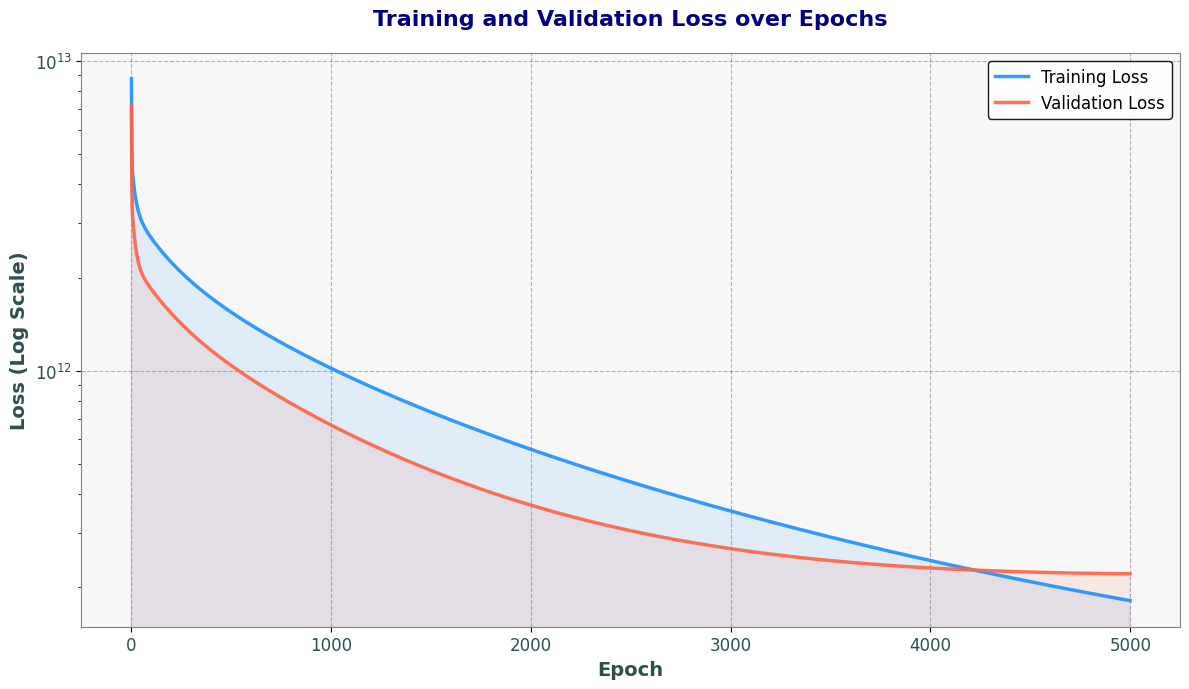

In [53]:
multiLR.plot_losses()

In [54]:
# Evaluate on multiple metrics
y_pred = multiLR.predict(X_val)
evaluations.append(evaluate_model(y_val, y_pred).loc[:, 'Value'])

#### Label Normalization
So far, we have been using normalized features to predict the original labels. In this section, we will explore scaling the labels to a smaller range to facilitate more efficient training.

##### Min-Max Scaler

In [55]:
epochs = 100
learning_rate = 0.1
log_interval = epochs / 10

In [56]:
multiLR = MultipleLinearRegression(X_train_bias, y_train_minmax, X_val_bias, y_val_minmax)
multiLR.train(epochs, learning_rate, log_interval)
models['Min-Max Scaler'] = multiLR

In [57]:
# Evaluate on multiple metrics
y_pred = multiLR.predict(X_val_bias)
evaluations_label_normalized.append(evaluate_model(y_val_minmax, y_pred).loc[:, 'Value'])

In [58]:
# Retransform to initial range
y_pred_original = y_pred * (train_max - train_min) + train_min
evaluations.append(evaluate_model(y_val, y_pred_original).loc[:, 'Value'])

##### Standardization

In [59]:
epochs = 2000
learning_rate = 0.1
log_interval = epochs / 10

In [60]:
multiLR = MultipleLinearRegression(X_train_bias, y_train_standardized, X_val_bias, y_val_standardized)
multiLR.train(epochs, learning_rate, log_interval)
models['Standardization'] = multiLR

In [61]:
# Evaluate on multiple metrics
y_pred = multiLR.predict(X_val_bias)
evaluations_label_normalized.append(evaluate_model(y_val_standardized, y_pred).loc[:, 'Value'])

In [62]:
# Retransform to initial range
y_pred_original = y_pred * val_std + val_mean
evaluations.append(evaluate_model(y_val, y_pred_original).loc[:, 'Value'])

#### Regularization

##### Lasso Regression

In [63]:
epochs = 3000
log_interval = epochs / 10
loss_fn = 'lasso'
learning_rate = 0.1
alpha = 0.1

In [64]:
multiLR = MultipleLinearRegression(X_train_bias, y_train, X_val_bias, y_val)
multiLR.train(epochs, learning_rate, log_interval, loss_fn, alpha=0.1)
models['Lasso'] = multiLR

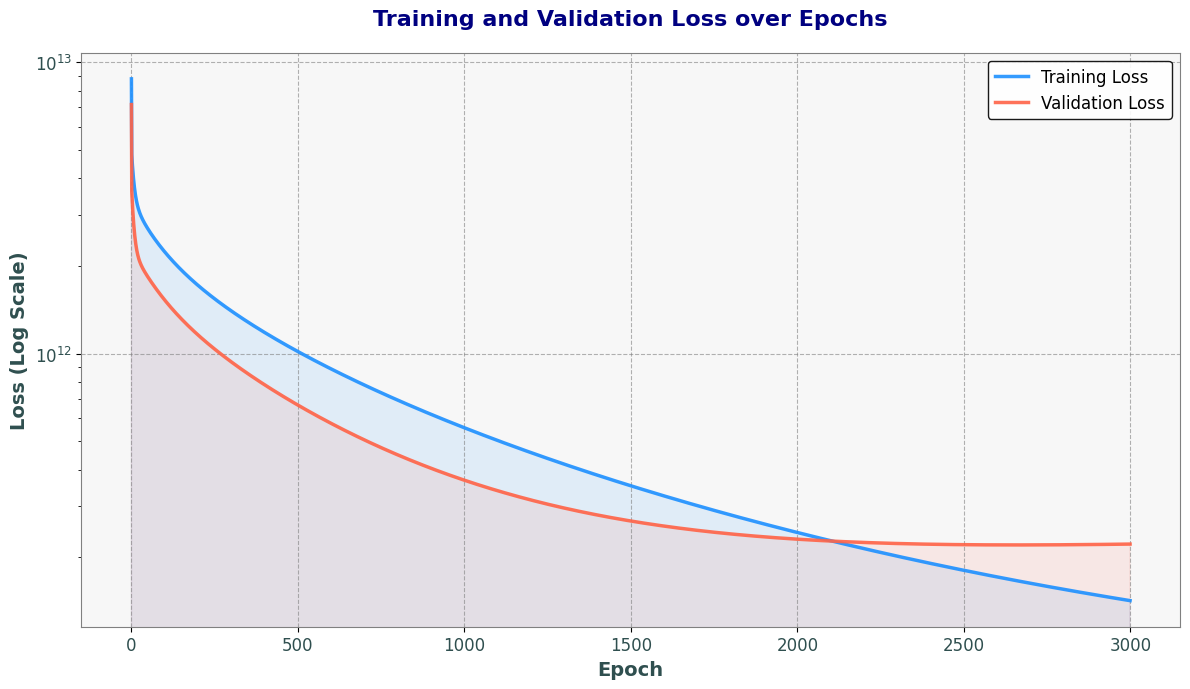

In [65]:
multiLR.plot_losses()

In [66]:
y_pred = multiLR.predict(X_val_bias)
evaluate_model(y_val, y_pred)

Metric         Value
0       Mean Squared Error  2.223322e+11
1  Root Mean Squared Error  4.715212e+05
2      Mean Absolute Error  2.901655e+05
3                R^2 Score  9.509219e-01

In [67]:
# Evaluate on multiple metrics
y_pred = multiLR.predict(X_val_bias)
evaluations.append(evaluate_model(y_val, y_pred).loc[:, 'Value'])

##### Ridge Regression

In [68]:
epochs = 3000
log_interval = epochs / 10
loss_fn = 'ridge'
learning_rate = 0.1
alpha = 0.0001

In [69]:
multiLR = MultipleLinearRegression(X_train_bias, y_train, X_val_bias, y_val)
multiLR.train(epochs, learning_rate, log_interval, loss_fn, alpha)
models['Ridge'] = multiLR

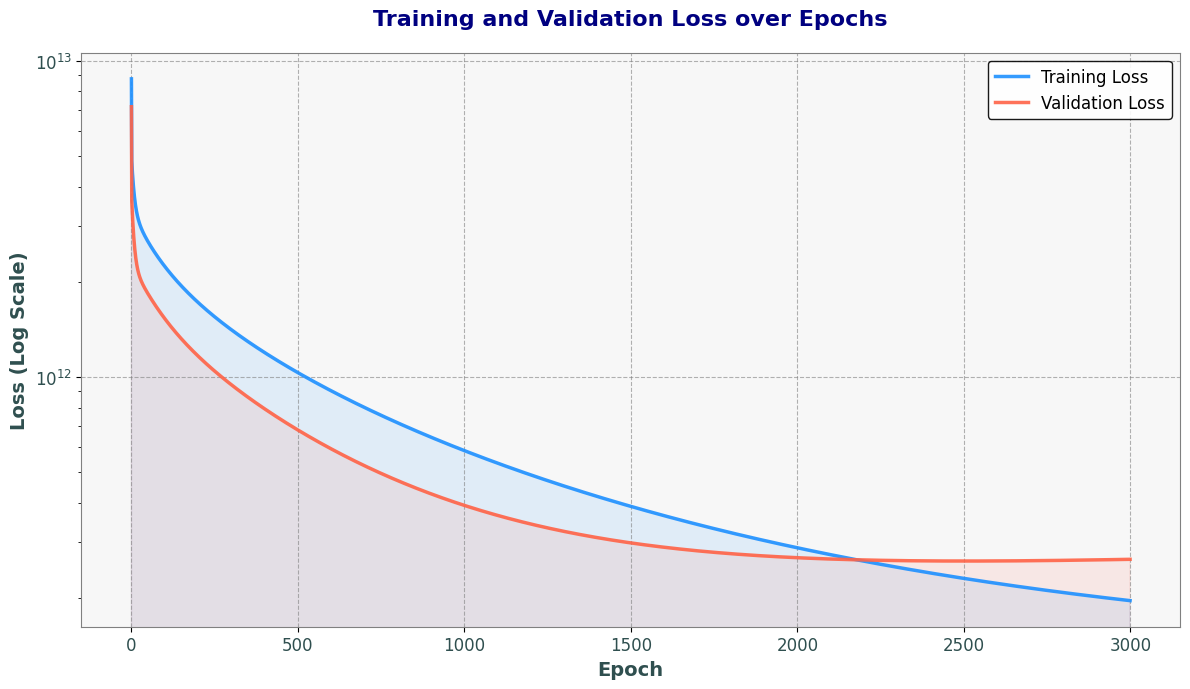

In [70]:
multiLR.plot_losses()

In [71]:
# Evaluate on multiple metrics
y_pred = multiLR.predict(X_val_bias)
evaluations.append(evaluate_model(y_val, y_pred).loc[:, 'Value'])

### VII.5 Summary

In [72]:
# Evaluation summary
summary = pd.concat(evaluations, axis=1)
summary.index = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2 Score']
summary.columns = ['Base', 'No bias', 'Min-Max scaler', 'Standardization', 'Lasso', 'Ridge']
summary

Base       No bias  Min-Max scaler  \
Mean Squared Error       2.212506e+11  2.207125e+11    1.831076e+12   
Root Mean Squared Error  4.703728e+05  4.698005e+05    1.353173e+06   
Mean Absolute Error      2.992231e+05  2.980952e+05    6.941130e+05   
R^2 Score                9.511607e-01  9.512795e-01    5.958044e-01   

                         Standardization         Lasso         Ridge  
Mean Squared Error          4.740211e+11  2.223322e+11  2.208482e+11  
Root Mean Squared Error     6.884919e+05  4.715212e+05  4.699449e+05  
Mean Absolute Error         3.682402e+05  2.901655e+05  2.903846e+05  
R^2 Score                   8.953636e-01  9.509219e-01  9.512495e-01

In [73]:
# Evaluation summary on normalized labels
summary_label_normalized = pd.concat(evaluations_label_normalized, axis=1)
summary_label_normalized.index = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2 Score']
summary_label_normalized.columns = ['Min-Max scaler', 'Standardization']
summary_label_normalized

Min-Max scaler  Standardization
Mean Squared Error             0.005563         0.104636
Root Mean Squared Error        0.074588         0.323476
Mean Absolute Error            0.032565         0.173011
R^2 Score                      0.514647         0.895364

After experimenting with various approaches, the model with bias achieved the highest R² score. The elevated loss values can be attributed to the significant disparity in the range between the features and labels.

In [74]:
data.data['Price'].describe()

count    1.647000e+03
mean     1.696655e+06
std      2.360649e+06
min      4.900000e+04
25%      4.775000e+05
50%      8.250000e+05
75%      1.950000e+06
max      2.750000e+07
Name: Price, dtype: float64

However, the high R² score indicates that the model can account for 96.7% of the variance in the data, demonstrating that the base model, the model with bias, and the standardization method are all performing effectively. Ultimately, the model with bias was chosen as the final result.

In [75]:
model_multi = models['No bias']
y_pred = model_multi.predict(X_val)
result = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
result.head()

Actual     Predicted
0   2199000  3.826015e+06
1   5200000  6.802007e+06
2  19300000  1.745333e+07
3   1725000  2.364331e+06
4    395000  1.583227e+05

In [76]:
def plot_true_vs_predicted_train_val(train_true, train_pred, val_true, val_pred):
    train_true = np.array(train_true)
    train_pred = np.array(train_pred)
    val_true = np.array(val_true)
    val_pred = np.array(val_pred)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # --- Training Set ---
    # Scatter Plot: True vs Predicted (Training Set)
    ax1.scatter(train_pred, train_true, color='blue', alpha=0.5, label='Data Points')

    # Vẽ đường y = x (đường lý tưởng nếu dự đoán hoàn hảo)
    min_val_train = min(min(train_true), min(train_pred))
    max_val_train = max(max(train_true), max(train_pred))
    ax1.plot([min_val_train, max_val_train], [min_val_train, max_val_train],
             color='red', linestyle='--', label='Perfect Prediction Line')

    ax1.set_xlabel('Predicted Labels')
    ax1.set_ylabel('True Labels')
    ax1.set_title('Training Set: True vs Predicted')
    ax1.legend()
    ax1.grid(True)

    # --- Validation Set ---
    # Scatter Plot: True vs Predicted (Validation Set)
    ax2.scatter(val_pred, val_true, color='blue', alpha=0.5, label='Data Points')

    # Vẽ đường y = x (đường lý tưởng nếu dự đoán hoàn hảo)
    min_val_val = min(min(val_true), min(val_pred))
    max_val_val = max(max(val_true), max(val_pred))
    ax2.plot([min_val_val, max_val_val], [min_val_val, max_val_val],
             color='red', linestyle='--', label='Perfect Prediction Line')

    ax2.set_xlabel('Predicted Labels')
    ax2.set_ylabel('True Labels')
    ax2.set_title('Validation Set: True vs Predicted')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

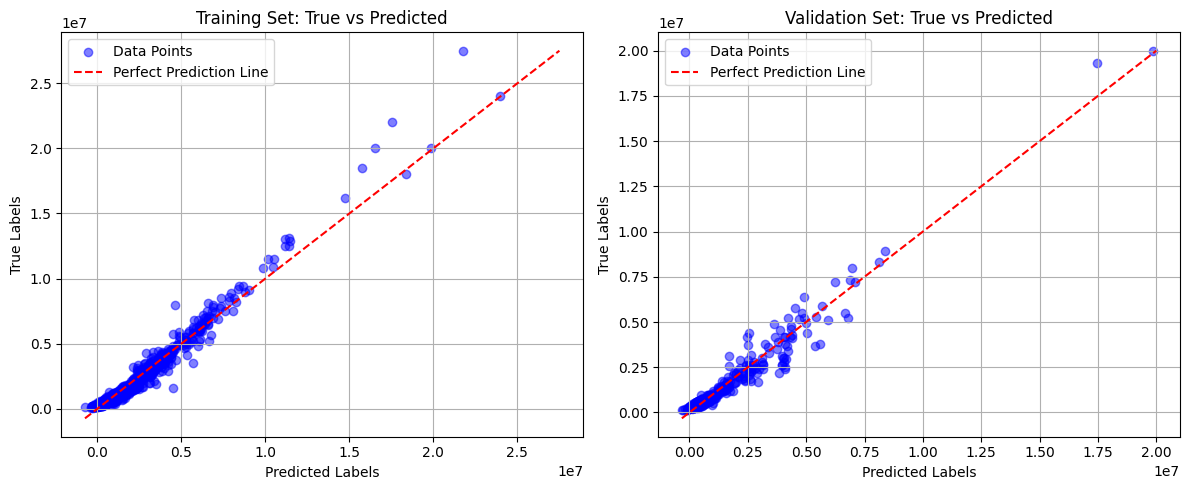

In [77]:
y_pred_train = model_multi.predict(X_train)
y_pred_val = model_multi.predict(X_val)

plot_true_vs_predicted_train_val(y_train, y_pred_train, y_val, y_pred_val)

## Part VIII: Polynomial Regression model

### VI.1: Model building

In [78]:
from itertools import combinations_with_replacement

In [79]:
class PolynomialFeatures:
    """
    Tạo ma trận đặc trưng đa thức.

    Parameters:
    -----------
    degree : int, mặc định=2
        Bậc của đa thức.

    include_bias : bool, mặc định=True
        Nếu True, thêm cột toàn 1 vào ma trận (hằng số).

    interaction_only : bool, mặc định=False
        Nếu True, chỉ bao gồm các tương tác giữa các đặc trưng.
    """

    def __init__(self, degree=2, include_bias=True, interaction_only=False):
        self.degree = degree
        self.include_bias = include_bias
        self.interaction_only = interaction_only

    def fit(self, X):
        """
        Tính số lượng đặc trưng đầu ra.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Ma trận đặc trưng đầu vào.

        Returns
        -------
        self : object
        """
        n_samples, n_features = np.asarray(X).shape
        self.n_input_features_ = n_features

        combinations = []
        for d in range(0, self.degree + 1):
            if d == 0 and not self.include_bias:
                continue
            if d == 1:
                combinations.extend(range(n_features))
                continue

            if self.interaction_only:
                combinations.extend(combinations_with_replacement(range(n_features), d))
            else:
                combinations.extend([c for c in combinations_with_replacement(range(n_features), d)
                                    if len(set(c)) == 1])

        self.n_output_features_ = len(combinations) + (1 if self.include_bias else 0)
        return self

    def transform(self, X):
        """
        Chuyển đổi đặc trưng thành đặc trưng đa thức.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Ma trận đặc trưng đầu vào.

        Returns
        -------
        XP : np.ndarray, shape (n_samples, n_output_features)
            Ma trận đặc trưng đa thức.
        """
        X = np.asarray(X)
        n_samples, n_features = X.shape

        if n_features != self.n_input_features_:
            raise ValueError("X shape does not match training shape")

        # Khởi tạo ma trận đầu ra
        XP = np.ones((n_samples, 0))

        # Thêm hằng số nếu include_bias=True
        if self.include_bias:
            XP = np.hstack((np.ones((n_samples, 1)), XP))

        # Thêm đặc trưng ban đầu (bậc 1)
        if self.degree >= 1:
            XP = np.hstack((XP, X))

        # Tạo đặc trưng đa thức bậc cao hơn
        for d in range(2, self.degree + 1):
            if self.interaction_only:
                combs = [c for c in combinations_with_replacement(range(n_features), d)
                         if len(set(c)) > 1]
            else:
                combs = list(combinations_with_replacement(range(n_features), d))

            for comb in combs:
                new_col = np.ones((n_samples, 1))
                for i in comb:
                    new_col = new_col * X[:, i:i+1]
                XP = np.hstack((XP, new_col))

        return XP

    def fit_transform(self, X, y=None):
        """
        Fit và transform cùng một lúc.
        """
        return self.fit(X).transform(X)

In [80]:
class MultipleRegression:
    """
    Hồi quy đa thức bằng OLS (Ordinary Least Squares).

    Parameters
    ----------
    fit_intercept : bool, mặc định=True
        Có tính hằng số hay không.
    """

    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y, alpha=0.1):
        """
        Huấn luyện mô hình hồi quy đa thức bằng OLS (Ordinary Least Squares)

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Ma trận đặc trưng.

        y : array-like, shape (n_samples,)
            Vector mục tiêu.

        alpha : float, mặc định=0.1

        Returns
        -------
        self : object
        """
        n_features = X.shape[1]

        # Thêm chính quy hóa L2 (Ridge): (X^T X + αI)^(-1) X^T y
        identity = np.identity(n_features)
        beta = np.linalg.inv(X.T.dot(X) + alpha * identity).dot(X.T).dot(y)

        self.weight = beta
        if self.fit_intercept:
            self.intercept_ = beta[0]
            self.coef_ = beta[1:]
        else:
            self.intercept_ = 0.0
            self.coef_ = beta

        return self

    def predict(self, X):
        """
        Dự đoán sử dụng mô hình đã huấn luyện.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Ma trận đặc trưng.

        Returns
        -------
        y_pred : array, shape (n_samples,)
            Giá trị dự đoán.
        """
        X = np.asarray(X)
        return X.dot(self.weight)

In [81]:
class PolynomialRegression:
    """
    Hồi quy đa thức bằng phương pháp OLS.

    Parameters
    ----------
    degree : int, mặc định=2
        Bậc của đa thức.

    include_bias : bool, mặc định=True
        Có thêm cột toàn 1 vào ma trận không.

    interaction_only : bool, mặc định=False
        Chỉ bao gồm các tương tác giữa các đặc trưng.
    """

    def __init__(self, degree=2, include_bias=True, interaction_only=False):
        self.degree = degree
        self.include_bias = include_bias
        self.interaction_only = interaction_only
        self.poly = PolynomialFeatures(degree=degree,
                                       include_bias=include_bias,
                                       interaction_only=interaction_only)
        self.multiple_regression = MultipleRegression(fit_intercept=False if include_bias else True)
        self.train_losses = []

    def fit(self, X, y):
        """
        Huấn luyện mô hình hồi quy đa thức.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Ma trận đặc trưng.

        y : array-like, shape (n_samples,)
            Vector mục tiêu.

        Returns
        -------
        self : object
        """
        X_poly = self.poly.fit_transform(X)
        self.multiple_regression.fit(X_poly, y)
        self.weights = self.multiple_regression.weight
        return self

    def predict(self, X):
        """
        Dự đoán giá trị khi sử dụng mô hình đã huấn luyện.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Ma trận đặc trưng.

        Returns
        -------
        y_pred : array, shape (n_samples,)
            Giá trị dự đoán.
        """
        X_poly = self.poly.transform(X)
        return self.multiple_regression.predict(X_poly)


In [82]:
class PolynomialRegressionGD:
    """
    Hồi quy đa thức Polynomial Regression bằng phương pháp Gradient Descent.
    """

    def __init__(self, degree=2, learning_rate=0.01, n_iterations=1000, batch_size=None,
                 random_state=None, epsilon=1e-8, include_bias=True, interaction_only=False):
        """
        Khởi tạo mô hình Polynomial Regression.

        Parameters:
        -----------
        degree : int, default=2
            Bậc của đa thức
        learning_rate : float, default=0.01
            Tốc độ học (alpha)
        n_iterations : int, default=1000
            Số lần lặp tối đa (epochs)
        batch_size : int, default=None
            Kích thước batch (None = dùng toàn bộ dữ liệu)
        random_state : int, default=None
            Giá trị khởi tạo cho random
        epsilon : float, default=1e-8
            Ngưỡng hội tụ
        """
        self.degree = degree
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.batch_size = batch_size
        self.random_state = random_state
        self.epsilon = epsilon
        self.lambda_reg = 0.01
        self.weights = None
        self.history = {'loss': [], 'weights': []}
        self.include_bias = include_bias
        self.interaction_only = interaction_only
        self.poly = PolynomialFeatures(degree=degree,
                                       include_bias=include_bias,
                                       interaction_only=interaction_only)

        if random_state is not None:
            np.random.seed(random_state)

    def _compute_cost(self, X, y, weights):
        """
        Tính toán hàm mất mát (MSE - Mean Squared Error).

        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            Ma trận đặc trưng
        y : ndarray, shape (n_samples,)
            Mảng giá trị thực tế
        weights : ndarray, shape (n_features,)
            Mảng trọng số của mô hình

        Returns:
        --------
        float : Giá trị hàm mất mát
        """
        n_samples = X.shape[0]
        y_pred = self._predict_with_weights(X, weights)
        error = y_pred - y
        cost = np.sum(error ** 2) / (2 * n_samples)

        # Thêm chính quy hóa L2
        reg_term = (self.lambda_reg / (2*n_samples)) * np.sum(weights[1:]**2)
        cost = cost + reg_term
        return cost

    def _compute_gradient(self, X, y, weights):
        """
        Tính toán gradient của hàm mất mát.

        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            Ma trận đặc trưng
        y : ndarray, shape (n_samples,)
            Mảng giá trị thực tế
        weights : ndarray, shape (n_features,)
            Mảng trọng số của mô hình

        Returns:
        --------
        ndarray, shape (n_features,) : Gradient của hàm mất mát
        """
        n_samples = X.shape[0]
        y_pred = self._predict_with_weights(X, weights)
        error = y_pred - y
        gradient = (X.T @ error) / n_samples

        # Thêm chính quy hóa L2 (không áp dụng cho bias)
        reg_gradient = np.zeros_like(weights)
        if self.include_bias:
            reg_gradient[1:] = (self.lambda_reg / n_samples) * weights[1:]
        else:
            reg_gradient = (self.lambda_reg / n_samples) * weights

        gradient = gradient + reg_gradient
        return gradient

    def _predict_with_weights(self, X, weights):
        """
        Dự đoán giá trị với trọng số cho trước.

        Parameters:
        -----------
        X : ndarray
            Ma trận đặc trưng
        weights : ndarray
            Mảng trọng số

        Returns:
        --------
        ndarray : Mảng giá trị dự đoán
        """
        return X @ weights

    def fit(self, X, y, verbose=False):
        """
        Huấn luyện mô hình trên dữ liệu X, y.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Mảng đặc trưng đầu vào
        y : array-like, shape (n_samples,)
            Mảng giá trị đầu ra
        verbose : bool, default=False
            Nếu True, in ra thông tin trong quá trình huấn luyện

        Returns:
        --------
        self : Đối tượng
        """
        # Chuyển đổi dữ liệu thành mảng numpy
        X = np.asarray(X)
        y = np.asarray(y)

        # Tạo đặc trưng đa thức
        X_poly = self.poly.fit_transform(X)
        n_samples, n_features = X_poly.shape

        # Khởi tạo trọng số
        self.weights = np.zeros(n_features)

        # Xác định kích thước batch
        if self.batch_size is None or self.batch_size > n_samples:
            self.batch_size = n_samples

        # Quá trình huấn luyện
        for iteration in range(self.n_iterations):
            # Xáo trộn dữ liệu
            indices = np.random.permutation(n_samples)
            X_shuffled = X_poly[indices]
            y_shuffled = y[indices]

            # Mini-batch gradient descent
            for i in range(0, n_samples, self.batch_size):
                X_batch = X_shuffled[i:i + self.batch_size]
                y_batch = y_shuffled[i:i + self.batch_size]

                # Tính gradient và cập nhật trọng số
                gradient = self._compute_gradient(X_batch, y_batch, self.weights)
                self.weights -= self.learning_rate * gradient

            # Tính và lưu trữ giá trị loss
            current_loss = self._compute_cost(X_poly, y, self.weights)
            self.history['loss'].append(current_loss)
            self.history['weights'].append(self.weights.copy())

            # In thông tin nếu verbose=True
            if verbose and (iteration + 1) % max(1, self.n_iterations // 10) == 0:
                print(f"Epoch {iteration + 1}/{self.n_iterations}, Loss: {current_loss:.6f}")

            # Điều kiện dừng sớm
            if iteration > 0 and abs(self.history['loss'][iteration-1] - current_loss) < self.epsilon:
                if verbose:
                    print(f"Đã hội tụ sau {iteration + 1} epochs với loss: {current_loss:.6f}")
                break

        return self

    def predict(self, X):
        """
        Dự đoán giá trị cho dữ liệu mới.

        Parameters:
        -----------
        X : array-like, shape (n_samples,) hoặc (n_samples, 1)
            Mảng đặc trưng đầu vào

        Returns:
        --------
        ndarray, shape (n_samples,) : Mảng giá trị dự đoán
        """
        if self.weights is None:
            raise ValueError("Mô hình chưa được huấn luyện.")

        X = np.array(X)
        X_poly = self.poly.transform(X)
        return self._predict_with_weights(X_poly, self.weights)

    def plot_learning_curve(self):
        """
        Vẽ đồ thị giá trị loss theo các epoch.
        """
        if not self.history['loss']:
            raise ValueError("Mô hình chưa được huấn luyện.")

        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.history['loss']) + 1), self.history['loss'], marker='o', linestyle='-', markersize=2)
        plt.title('Đồ thị hàm mất mát theo epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE)')
        plt.grid(True)
        plt.show()

In [83]:
def plot_regression_line(model, X, y_true, name_plot=""):
    """
    Vẽ đồ thị đường hồi quy và dữ liệu.

    Parameters:
    -----------
    X : array-like, shape (n_samples,)
        Mảng đặc trưng đầu vào
    y : array-like, shape (n_samples,)
        Mảng giá trị thực tế
    name_plot : str, default=""
        Nhãn tiền tố của bảng đồ thị
    """
    if model.weights is None:
        raise ValueError("Mô hình chưa được huấn luyện.")

    y_pred = model.predict(X)
    plt.figure(figsize=(15, 6))

    # Plot 1: Scatter plot of predicted vs actual
    plt.subplot(1, 3, 1)
    plt.scatter(y_true, y_pred, alpha=0.5, label='Actual Prices')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], label='Predicted Line', color='red')
    plt.xlabel('Actual Values')
    plt.ylabel('Price')
    plt.title(name_plot + 'Actual vs Predicted')
    plt.legend()

    # Plot 2: Same scatter plot with log scale (helps with extreme values)
    plt.subplot(1, 3, 2)
    plt.scatter(y_true, y_pred, alpha=0.5, label='Actual Prices')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], label='Predicted Line', color='red')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Actual Values (log scale)')
    plt.ylabel('Price (log scale)')
    plt.title(name_plot + 'Actual vs Predicted - Log Scale')
    plt.legend()

    # Plot 3: Histogram of errors
    plt.subplot(1, 3, 3)
    residuals = y_pred - y_true
    plt.hist(residuals, bins=30, alpha=0.7, color='green')
    plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(name_plot + 'Residuals Distribution')

    plt.tight_layout()
    plt.show()

def display_equation(model, feature_names=None, precision=4, top_k=None):
    """
    Displays the polynomial regression equation based on the fitted weights.

    Parameters:
    -----------
    feature_names : list, optional
        List of original feature names. If None, uses X1, X2, etc.
    precision : int, default=4
        Number of decimal places to display for coefficients
    top_k : int, optional
        If provided, only shows the top k coefficients by absolute value

    Returns:
    --------
    str : The formatted equation string
    """
    if model.weights is None:
        raise ValueError("Model has not been trained yet.")

    if feature_names is None:
        if hasattr(model.poly, 'n_input_features_'):
            feature_names = [f"X{i+1}" for i in range(model.poly.n_input_features_)]
        else:
            feature_names = [f"X{i+1}" for i in range(1)]  # Default case

    # Get all terms from polynomial transformation
    powers = []
    for i in range(1, model.degree + 1):
        if i == 1:
            # Linear terms
            powers.extend([(j, 1) for j in range(len(feature_names))])
        else:
            # Higher degree terms including interactions
            for combo in combinations_with_replacement(range(len(feature_names)), i):
                term_powers = [0] * len(feature_names)
                for idx in combo:
                    term_powers[idx] += 1
                powers.append((None, term_powers))

    # Add bias term if included
    if model.include_bias:
        powers.insert(0, (None, None))

    # Format the equation
    terms = []

    # Get coefficient data for potential top_k filtering
    coef_data = []
    for i, coef in enumerate(model.weights):
        if i < len(powers):
            coef_data.append((i, coef, powers[i]))

    # Filter by top_k if specified
    if top_k is not None and top_k < len(coef_data):
        coef_data = sorted(coef_data, key=lambda x: abs(x[1]), reverse=True)[:top_k]
        print(f"Showing top {top_k} terms by coefficient magnitude:")

    # Format each term
    for i, coef, power_info in coef_data:
        if abs(coef) < 1e-10:  # Skip effectively zero coefficients
            continue

        if i == 0 and model.include_bias:
            # Bias term
            terms.append(f"{coef:.{precision}f}")
        else:
            # Format term based on power information
            if power_info[0] is not None:
                # Simple linear term
                term = feature_names[power_info[0]]
            else:
                # Higher-degree term
                if power_info[1] is None:
                    continue  # Skip if power info is not valid

                term_parts = []
                for j, power in enumerate(power_info[1]):
                    if power > 0:
                        if power == 1:
                            term_parts.append(f"{feature_names[j]}")
                        else:
                            term_parts.append(f"{feature_names[j]}^{power}")

                term = " × ".join(term_parts)

            # Add coefficient with sign
            if coef >= 0:
                if terms:  # Not the first term
                    terms.append(f"+ {coef:.{precision}f} × {term}")
                else:  # First term
                    terms.append(f"{coef:.{precision}f} × {term}")
            else:
                terms.append(f"- {abs(coef):.{precision}f} × {term}")

    equation = " ".join(terms)

    print(f"\nPolynomial Regression Equation (Degree {model.degree}):")
    print(f"y = {equation}")
    print(f"\nTotal number of coefficients: {len(model.weights)}")

    return equation

### VI.2: Training and evaluate

#### a) Prepare data

In [84]:
X_train = train_data.drop(columns=['Price'])
y_train = train_data['Price']

X_val = validation_data.drop(columns=['Price'])
y_val = validation_data['Price']

#### b) Train by PolynomialRegression (using OLS)

In [85]:
modelPoly = PolynomialRegression(degree=3)
modelPoly.fit(X_train, y_train)
print("Model trained successfully.")

Model trained successfully.


In [86]:
# On Traning Set
y_pred = modelPoly.predict(X_train)
model_eval = evaluate_model(y_train, y_pred)
print('Evaluate metrics on Training Set:')
model_eval

Evaluate metrics on Training Set:


Metric         Value
0       Mean Squared Error  2.904421e+10
1  Root Mean Squared Error  1.704236e+05
2      Mean Absolute Error  9.607227e+04
3                R^2 Score  9.950163e-01

In [87]:
# On Validation Set
y_pred = modelPoly.predict(X_val)
model_eval = evaluate_model(y_val, y_pred)
print('Evaluate metrics on Validation Set:')
model_eval

Evaluate metrics on Validation Set:


Metric         Value
0       Mean Squared Error  2.018945e+11
1  Root Mean Squared Error  4.493268e+05
2      Mean Absolute Error  2.430223e+05
3                R^2 Score  9.554334e-01

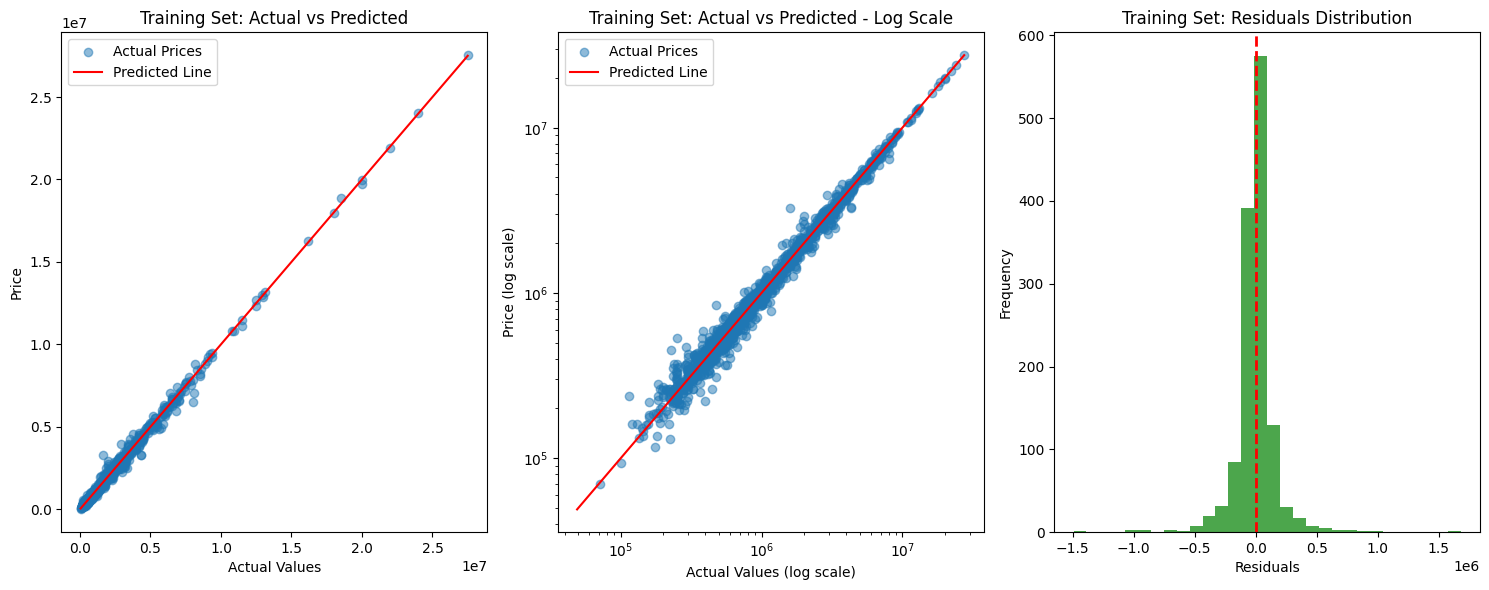

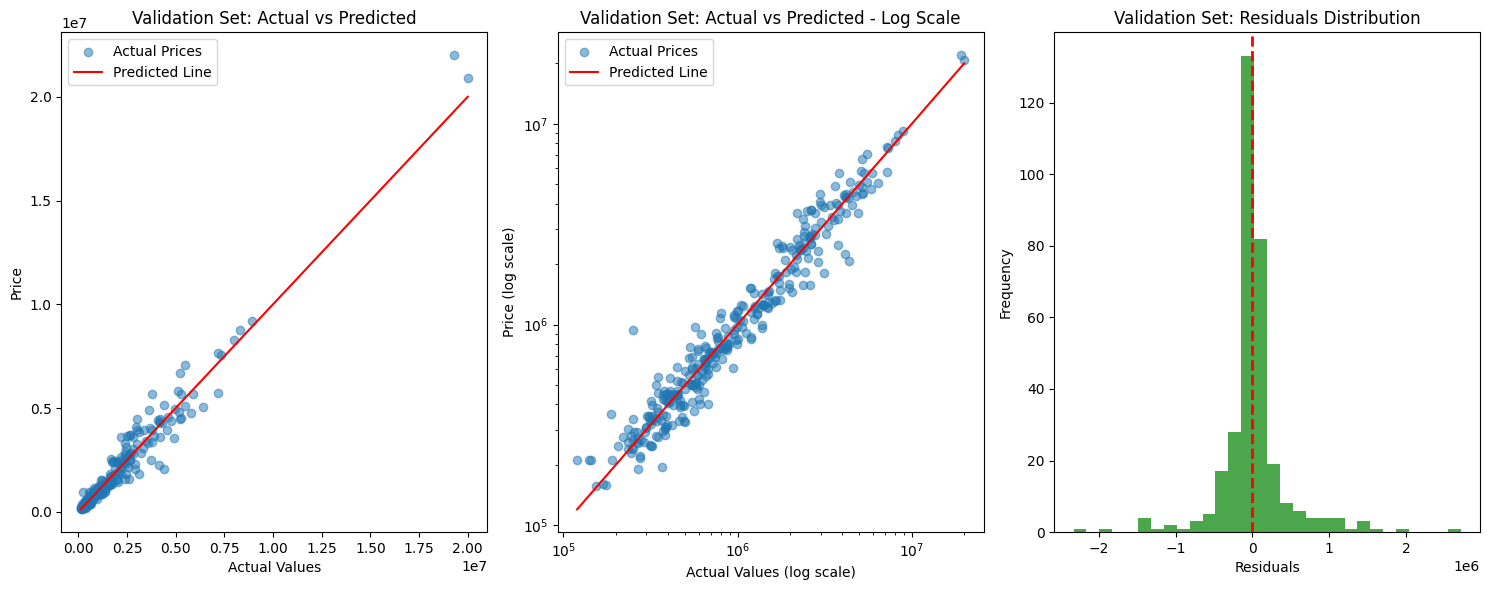

In [88]:
plot_regression_line(model=modelPoly, X=X_train, y_true=y_train, name_plot="Training Set: ")
plot_regression_line(model=modelPoly, X=X_val, y_true=y_val, name_plot="Validation Set: ")

In [89]:
display_equation(model=modelPoly, feature_names = X_train.columns.tolist(), top_k=10)

Showing top 10 terms by coefficient magnitude:

Polynomial Regression Equation (Degree 3):
y = 2620481.0020 × Model + 2367461.4535 × Model × Year + 2143996.5901 × Model × Year^2 + 1399854.9912 × Model × Kilometer + 1290135.8490 × Model × Location + 1290135.8490 × Model × Location^2 + 1286696.6650 × Model × Year × Kilometer + 1061358.2530 × Model × Height + 986126.1016 × Model × Transmission + 986126.1015 × Model × Transmission^2

Total number of coefficients: 2024


'2620481.0020 × Model + 2367461.4535 × Model × Year + 2143996.5901 × Model × Year^2 + 1399854.9912 × Model × Kilometer + 1290135.8490 × Model × Location + 1290135.8490 × Model × Location^2 + 1286696.6650 × Model × Year × Kilometer + 1061358.2530 × Model × Height + 986126.1016 × Model × Transmission + 986126.1015 × Model × Transmission^2'

#### c) Train by PolynomialRegressionGD (using Gradient Descent)

In [90]:
modelPoly = PolynomialRegressionGD(
        degree=3,
        learning_rate=0.01,
        n_iterations=5000,
        batch_size=32,
        random_state=42
)

modelPoly.fit(X_train, y_train, verbose=True)
print("Model trained successfully.")

Epoch 500/5000, Loss: 37417850297.694397
Epoch 1000/5000, Loss: 27052931732.656155
Epoch 1500/5000, Loss: 25696671823.121372
Epoch 2000/5000, Loss: 23252963362.803852
Epoch 2500/5000, Loss: 22322212241.266010
Epoch 3000/5000, Loss: 21916655521.753498
Epoch 3500/5000, Loss: 22918587680.745514
Epoch 4000/5000, Loss: 22648314339.013531
Epoch 4500/5000, Loss: 20682277735.057858
Epoch 5000/5000, Loss: 20342161463.867050
Model trained successfully.


In [91]:
# On Traning Set
y_pred = modelPoly.predict(X_train)
model_eval = evaluate_model(y_train, y_pred)
print('Evaluate metrics on Training Set:')
model_eval

Evaluate metrics on Training Set:


Metric         Value
0       Mean Squared Error  4.039820e+10
1  Root Mean Squared Error  2.009930e+05
2      Mean Absolute Error  1.128927e+05
3                R^2 Score  9.930681e-01

In [92]:
# On Validation Set
y_pred = modelPoly.predict(X_val)
model_eval = evaluate_model(y_val, y_pred)
print('Evaluate metrics on Validation Set:')
model_eval

Evaluate metrics on Validation Set:


Metric         Value
0       Mean Squared Error  1.898114e+11
1  Root Mean Squared Error  4.356735e+05
2      Mean Absolute Error  2.289700e+05
3                R^2 Score  9.581006e-01

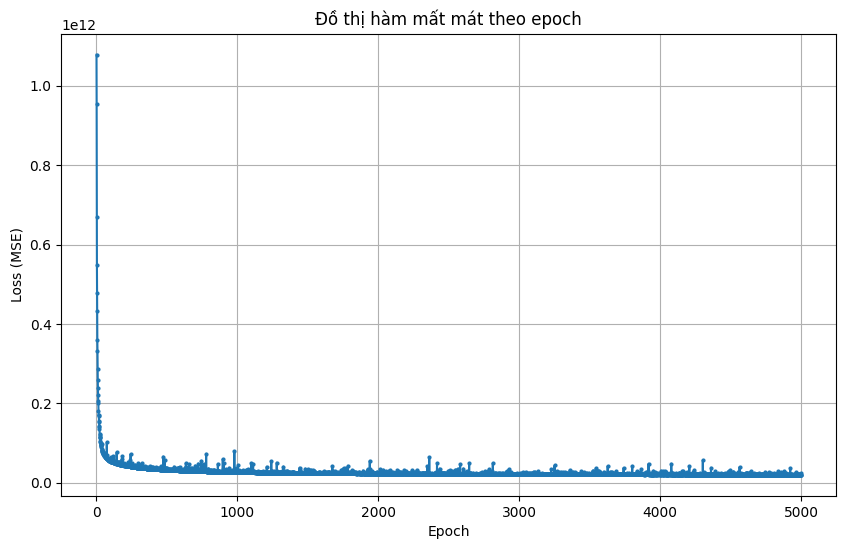

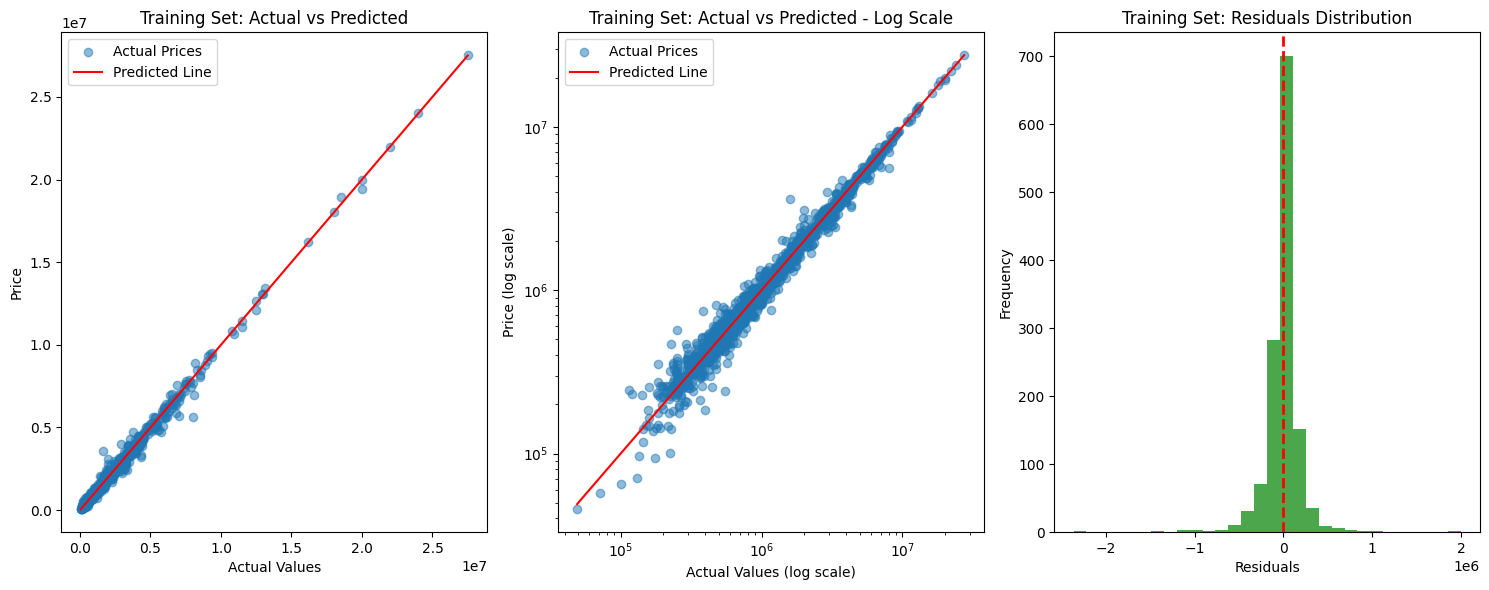

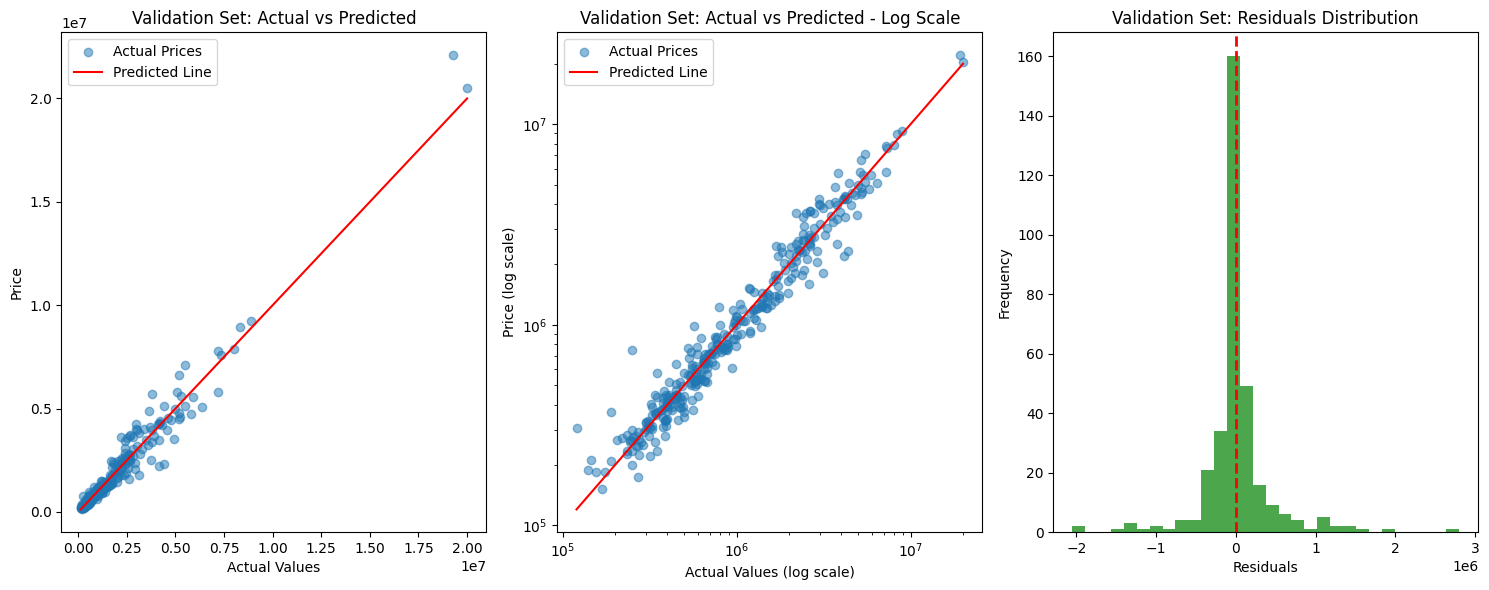

In [93]:
modelPoly.plot_learning_curve()
plot_regression_line(model=modelPoly, X=X_train, y_true=y_train, name_plot="Training Set: ")
plot_regression_line(model=modelPoly, X=X_val, y_true=y_val, name_plot="Validation Set: ")

In [94]:
display_equation(model=modelPoly, feature_names=X_train.columns.tolist(), top_k=10)

Showing top 10 terms by coefficient magnitude:

Polynomial Regression Equation (Degree 3):
y = 1680790.7703 × Model + 1559994.1677 × Model × Year + 1464639.3648 × Model × Year^2 + 1046459.7736 × Model × Transmission + 1046459.7736 × Model × Transmission^2 + 1009863.5419 × Model × Kilometer + 946888.0919 × Model × Year × Transmission + 938621.1008 × Model × Location + 938621.1008 × Model × Location^2 + 935093.6800 × Model × Year × Kilometer

Total number of coefficients: 2024


'1680790.7703 × Model + 1559994.1677 × Model × Year + 1464639.3648 × Model × Year^2 + 1046459.7736 × Model × Transmission + 1046459.7736 × Model × Transmission^2 + 1009863.5419 × Model × Kilometer + 946888.0919 × Model × Year × Transmission + 938621.1008 × Model × Location + 938621.1008 × Model × Location^2 + 935093.6800 × Model × Year × Kilometer'

## Part IX: Linear Regression model with PCA

#### IX.1 Data and Heatmap

In [95]:
train_data_PCA= copy.deepcopy(train_data_after_encoding)
validation_data_PCA = copy.deepcopy(validation_data_after_encoding)

train_data_PCA = train_data_PCA.data # train_data_PCA (after encoding)
validation_data_PCA = validation_data_PCA.data # validation_data_PCA (after encoding)

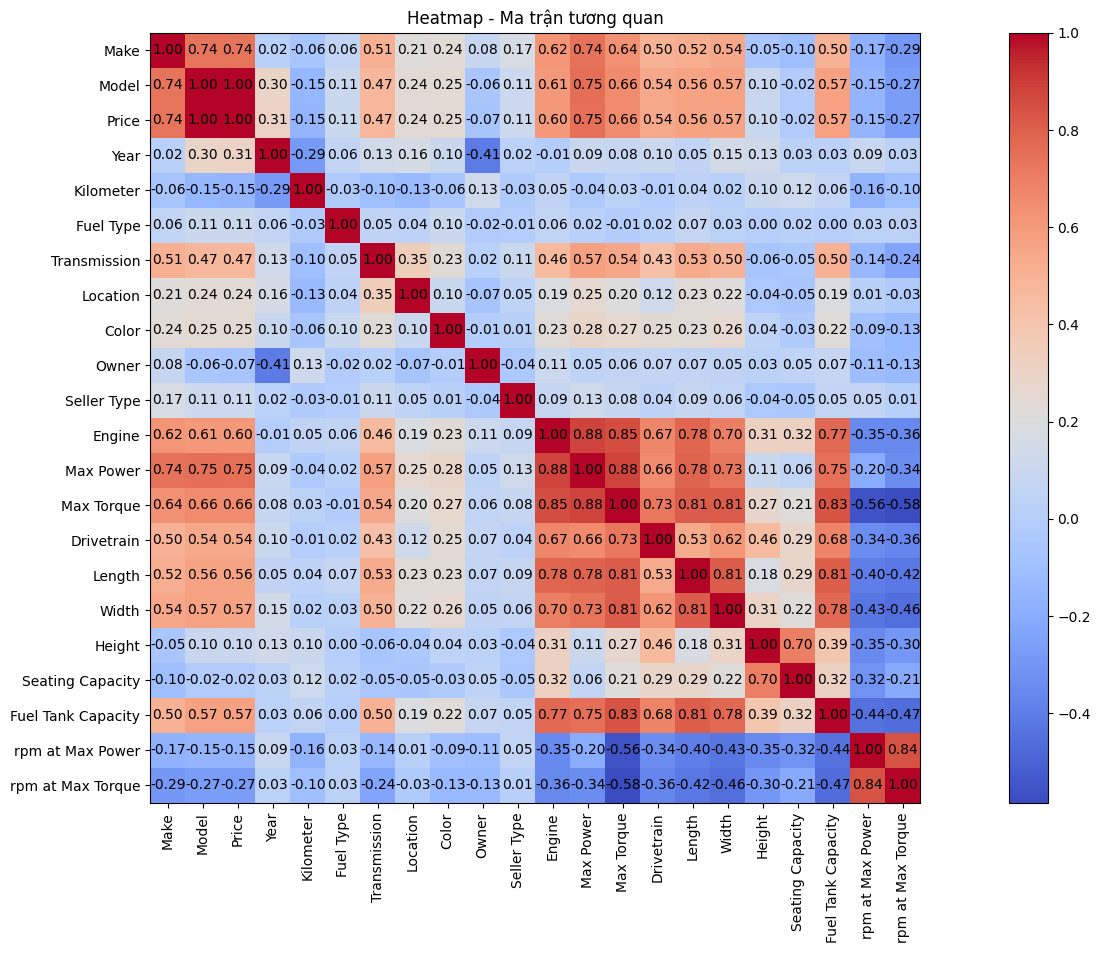

In [96]:
# Tính ma trận tương quan
correlation_matrix = train_data_PCA.corr().to_numpy()
labels = train_data_PCA.columns

# Vẽ heatmap bằng Matplotlib
plt.figure(figsize=(23, 10))  # Điều chỉnh kích thước
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar()  # Thanh màu

# Thêm giá trị số vào mỗi ô
num_vars = len(correlation_matrix)
for i in range(num_vars):
    for j in range(num_vars):
        plt.text(j, i, f"{correlation_matrix[i, j]:.2f}", ha="center", va="center", color="black")

# Đặt tên trục
plt.xticks(np.arange(num_vars), labels, rotation=90)
plt.yticks(np.arange(num_vars), labels)

plt.title("Heatmap - Ma trận tương quan")
plt.show()

Nhận xét: Từ ma trận heatmap (Ma trận tương quan) ta thấy những bộ tương quan sau có thể giảm số chiều về 1

['Seating Capacity', 'Length', 'Height', 'Width', 'Fuel Tank Capacity']

['Engine', 'Max Power', 'Max Torque', 'Drivetrain']

['rpm at Max Power', 'rpm at Max Torque']

#### IX.2 PCA

In [97]:
def pca(X, num_components):
    """
    Áp dụng PCA để trích xuất số lượng thành phần chính mong muốn.
    """
    X_meaned = X - np.mean(X, axis=0)  # Chuẩn hóa dữ liệu
    covariance_matrix = np.cov(X_meaned, rowvar=False)  # Ma trận hiệp phương sai
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)  # Eigen decomposition
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Sắp xếp giá trị riêng giảm dần
    eigenvectors_sorted = eigenvectors[:, sorted_indices]  # Lấy vector riêng theo thứ tự
    principal_components = eigenvectors_sorted[:, :num_components]  # Chọn số thành phần chính
    X_pca = np.dot(X_meaned, principal_components)  # Biến đổi dữ liệu sang PCA
    return X_pca, principal_components  # Trả về dữ liệu PCA + vector chính

# Số thành phần chính
num_components = 1

# --- BƯỚC 1: ÁP DỤNG PCA TRÊN TRAIN ---
columns_to_pca_groups = {
    'hs': ['Seating Capacity', 'Length', 'Height', 'Width', 'Fuel Tank Capacity'],
    'cs': ['Engine', 'Max Power', 'Max Torque', 'Drivetrain'],
    'kt': ['rpm at Max Power', 'rpm at Max Torque']
}

pca_results = {}

for group, columns in columns_to_pca_groups.items():
    for col in columns:
        if col not in train_data_PCA.columns:
            raise KeyError(f"Cột '{col}' không tồn tại trong train_data_after_normalization.")

    X_pca_input = train_data_PCA[columns].values
    X_pca_transformed, principal_components = pca(X_pca_input, num_components)

    pca_results[group] = {
        'transformed': X_pca_transformed,
        'components': principal_components
    }

# Tạo dataframe chứa PCA từ train
pca_df1 = pd.DataFrame(pca_results['hs']['transformed'], columns=['PCA_hs'])
pca_df2 = pd.DataFrame(pca_results['cs']['transformed'], columns=['PCA_cs'])
pca_df3 = pd.DataFrame(pca_results['kt']['transformed'], columns=['PCA_kt'])

# Xóa các cột gốc trong train
train_data_after_normalization1 = train_data_PCA.drop(
    columns=sum(columns_to_pca_groups.values(), [])
)

# Gộp train với các thành phần PCA
train_data_after_normalization1 = pd.concat([train_data_after_normalization1, pca_df1, pca_df2, pca_df3], axis=1)

# --- BƯỚC 2: ÁP DỤNG PCA TRÊN VALIDATION ---
val_data_after_normalization1 = validation_data_PCA.copy()

for group, columns in columns_to_pca_groups.items():
    for col in columns:
        if col not in validation_data_PCA.columns:
            raise KeyError(f"Cột '{col}' không tồn tại trong val_data_after_normalization.")

    X_val_input = validation_data_PCA[columns].values
    X_val_meaned = X_val_input - np.mean(train_data_PCA[columns].values, axis=0)  # Dùng mean từ train
    X_val_pca = np.dot(X_val_meaned, pca_results[group]['components'])  # Transform bằng PCA từ train

    val_data_after_normalization1[f'PCA_{group}'] = X_val_pca

# Xóa các cột gốc trong validation
val_data_after_normalization1.drop(columns=sum(columns_to_pca_groups.values(), []), inplace=True)


#### IX.3 Split data

In [98]:
train_data_v2 = copy.deepcopy(train_data_after_normalization1)
validation_data_v2 = copy.deepcopy(val_data_after_normalization1)

numeric_features = ['Make', 'Model', 'Year', 'Kilometer', 'Fuel Type', 'Transmission',
                    'Location', 'Color', 'Owner', 'Seller Type', 'PCA_hs', 'PCA_cs', 'PCA_kt']

for col in numeric_features:
    mean = train_data_v2[col].mean()
    std = train_data_v2[col].std()

    if std == 0:
        std = 1

    train_data_v2[col] = (train_data_v2[col] - mean) / std
    validation_data_v2[col] = (validation_data_v2[col] - mean) / std


X_train_v2 = train_data_v2.drop(columns=['Price'])
y_train_v2 = train_data_v2['Price']

X_val_v2 = validation_data_v2.drop(columns=['Price'])
y_val_v2 = validation_data_v2['Price']

print("Shape of validation_data_v2 after scaling:", validation_data_v2.shape)
print("Shape of validation_data_v2 after scaling:", train_data_v2.shape)

Shape of validation_data_v2 after scaling: (330, 14)
Shape of validation_data_v2 after scaling: (1317, 14)


####  IX.4 Model with PCA

##### Model Multiple Linear Regression with PCA


Evaluation metrics on Training Set:
Epoch 10, loss: 1344845186703.9443
Epoch 20, loss: 563799829311.5236
Epoch 30, loss: 322380446029.1565
Epoch 40, loss: 222517837312.3698
Epoch 50, loss: 167235994902.3570
Epoch 60, loss: 131634203755.2664
Epoch 70, loss: 108130519923.9323
Epoch 80, loss: 91910279236.4681
Epoch 90, loss: 80421715003.8295
Epoch 100, loss: 72153690078.5589
Epoch 110, loss: 66356711368.5435
Epoch 120, loss: 62243927078.5978
Epoch 130, loss: 59293769242.1235
Epoch 140, loss: 57168362886.5283
Epoch 150, loss: 55644129586.6835
Epoch 160, loss: 54553554996.2842
Epoch 170, loss: 53765293405.6344
Epoch 180, loss: 53263080810.6606
Epoch 190, loss: 52855017841.3932
Epoch 200, loss: 52582191892.8118
Best model found with loss = 52582191892.8118


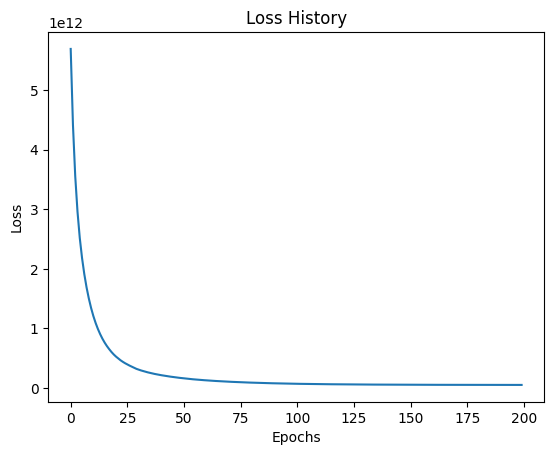

In [99]:
class MultipleLinearRegressionPCA:
    def __init__(self, learning_rate=0.01, n_epochs=1000, batch_size=32):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        self.loss_history = []

    def compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def forward(self, X):
        return np.dot(X, self.weights) + self.bias

    def backward(self, X, y_true, y_pred):
        dw = -2 / len(X) * np.dot(X.T, (y_true - y_pred))
        db = -2 / len(X) * np.sum((y_true - y_pred))
        return dw, db

    def fit(self, X_train, y_train):
        if isinstance(X_train, (pd.DataFrame, pd.Series)):
             X_train = X_train.to_numpy()
        if isinstance(y_train, (pd.DataFrame, pd.Series)):
            y_train = y_train.to_numpy()

        n_samples, n_features = X_train.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        if y_train.ndim == 1:
            y_train = y_train.reshape(-1, 1)

        best_loss = float('inf')
        best_weights = None
        best_bias = None
        self.loss_history = []

        for epoch in range(self.n_epochs):
            idx = np.random.permutation(n_samples)
            X_train = X_train[idx]
            y_train = y_train[idx]

            for i in range(0, n_samples, self.batch_size):
                X_batch = X_train[i:i + self.batch_size]
                y_batch = y_train[i:i + self.batch_size]

                y_pred = self.forward(X_batch)
                dw, db = self.backward(X_batch, y_batch, y_pred)

                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            # Tính loss trên toàn bộ tập train
            y_train_pred = self.forward(X_train)
            loss = self.compute_loss(y_train, y_train_pred)
            self.loss_history.append(loss)

            if loss < best_loss:
                best_loss = loss
                best_weights = self.weights.copy()
                best_bias = self.bias

            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1}, loss: {loss:.4f}")

        self.weights = best_weights
        self.bias = best_bias
        print(f"Best model found with loss = {best_loss:.4f}")

        return y_train ,y_train_pred

    def evaluate(self, X_test, y_test, isTest = False):
        if isinstance(X_test, pd.DataFrame) or isinstance(X_test, pd.Series):
            X_test = X_test.to_numpy()
        if isinstance(y_test, pd.DataFrame) or isinstance(y_test, pd.Series):
            y_test = y_test.to_numpy()

        if y_test.ndim == 1:
            y_test = y_test.reshape(-1, 1)

        y_test_pred = self.forward(X_test)
        test_loss = self.compute_loss(y_test, y_test_pred)
        if (not isTest): print(f"Test Loss: {test_loss:.4f}")

        weights = self.weights.flatten()
        bias = self.bias
        terms = [f"{w:.2f} * x{i+1}" for i, w in enumerate(weights)]
        equation = " + ".join(terms) + f" + {bias:.2f}"

        if (not isTest): print("\nPhương trình hồi quy tuyến tính:")
        if (not isTest): print(f"y = {equation}")

        # Vẽ đồ thị dự đoán
        if (not isTest): self.plot_actual_vs_predicted(y_test, y_test_pred)
        if (not isTest): self.plot_residuals(y_test, y_test_pred)

        return test_loss, y_test_pred

    def mean_absolute_percentage_error(self, y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    def plot_loss_history(self):
        plt.plot(self.loss_history)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Loss History")
        plt.show()

    def plot_actual_vs_predicted(self, y_true, y_pred):
        plt.scatter(y_true, y_pred, alpha=0.5)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title("Actual vs Predicted")
        plt.show()

    def plot_residuals(self, y_true, y_pred):
        residuals = y_true - y_pred
        plt.scatter(y_pred, residuals, alpha=0.5)
        plt.axhline(y=0, color='red', linestyle='--')
        plt.xlabel("Predicted Values")
        plt.ylabel("Residuals")
        plt.title("Residual Plot")
        plt.show()


# Train and Evaluate Model
print("\nEvaluation metrics on Training Set:")
modelPCA = MultipleLinearRegressionPCA(learning_rate=0.001, n_epochs=200)
y_train , y_train_pred = modelPCA.fit(X_train_v2, y_train_v2)
modelPCA.plot_loss_history()

In [100]:
print("\nEvaluation metrics on Training Set:")
evaluate_model(y_train, y_train_pred)


Evaluation metrics on Training Set:


Metric         Value
0       Mean Squared Error  5.258219e+10
1  Root Mean Squared Error  2.293081e+05
2      Mean Absolute Error  9.664783e+04
3                R^2 Score  9.909775e-01

Test Loss: 296327023058.8829

Phương trình hồi quy tuyến tính:
y = 57053.91 * x1 + 2334937.06 * x2 + 39726.28 * x3 + -8225.35 * x4 + 1453.96 * x5 + -10862.79 * x6 + -2495.07 * x7 + -3127.61 * x8 + -18726.41 * x9 + 7033.37 * x10 + 11093.16 * x11 + -7688.92 * x12 + -4132.73 * x13 + 1716098.23


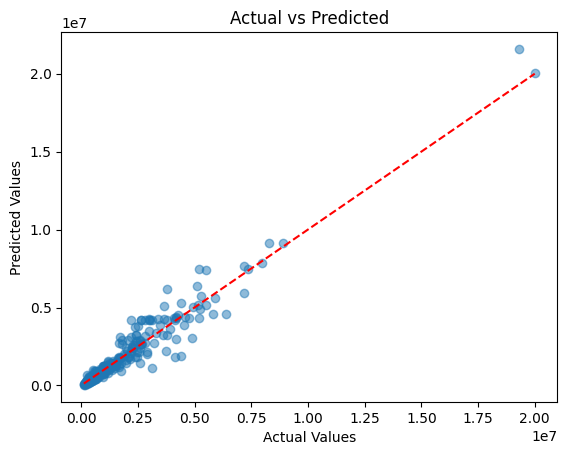

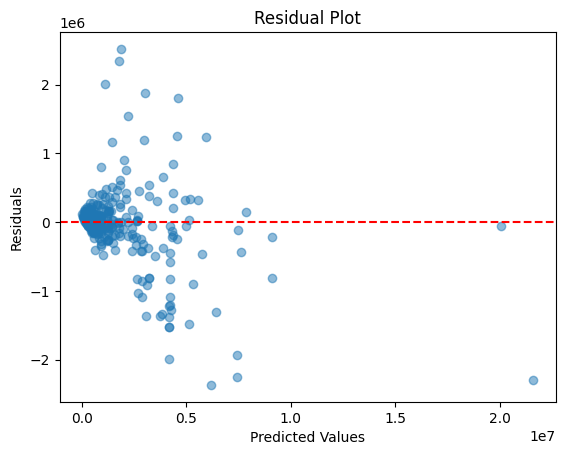

In [101]:
test_loss, y_test_pred = modelPCA.evaluate(X_val_v2, y_val_v2)

In [102]:
print("\nEvaluation metrics on Validation Set:")
evaluate_model(y_val_v2, y_test_pred.reshape(-1))


Evaluation metrics on Validation Set:


Metric         Value
0       Mean Squared Error  2.963270e+11
1  Root Mean Squared Error  5.443593e+05
2      Mean Absolute Error  2.917471e+05
3                R^2 Score  9.345882e-01

Actual vs Predicted

In [103]:
# Sao chép dữ liệu
y_test_pred_copy = np.copy(y_test_pred)
y_val_v2_copy = np.copy(y_val_v2)

# Chuyển về 1D nếu cần
y_test_pred_copy = y_test_pred_copy.ravel()
y_val_v2_copy = y_val_v2_copy.ravel()

# Tạo DataFrame
df_PCA1 = pd.DataFrame({'Predicted': y_test_pred_copy, 'Actual': y_val_v2_copy})

# Chuyển về kiểu int nếu không gây lỗi
df_PCA1 = df_PCA1.astype(int, errors='ignore')  # Dùng 'ignore' để tránh lỗi nếu có giá trị không chuyển được

In [104]:
df_PCA1.head(10)

Predicted    Actual
0    4188617   2199000
1    7447893   5200000
2   21591840  19300000
3    1744653   1725000
4     373078    395000
5     189891    245000
6     139037    275000
7     890173    885000
8     429557    560000
9    4177395   2650000

## Part X: Evaluate on Test set

In [105]:
file_test_path = './data/train.csv'

In [106]:
def evaluate_test_set_simpleLR(file_test_path, weight_simpleLR):
    data = DataProcessor(file_test_path)
    data.load_data(isTest = True)
    data.clean_data()
    data.transform_data()
    data.encode_data_test_set(encoding_information)
    data.normalize_data_test_set(range_vals, min_vals)
    test_data = data.data

    X = test_data.drop(columns=['Price'])
    y = test_data['Price']

    beta0 = weight_simpleLR[0]
    beta1 = weight_simpleLR[1]
    print("\nEvaluation metrics on Test Set (Simple LR):")
    y_pred = beta0 + beta1 * X['Model']

    model_eval = evaluate_model(y, y_pred)
    return model_eval

evaluate_test_set_simpleLR(file_test_path, weight_simpleLR)


Evaluation metrics on Test Set (Simple LR):


Metric         Value
0       Mean Squared Error  1.059135e+11
1  Root Mean Squared Error  3.254436e+05
2      Mean Absolute Error  1.201861e+05
3                R^2 Score  9.809825e-01

In [107]:
def evaluate_test_set_multipleLR(file_test_path):
    data = DataProcessor(file_test_path)
    data.load_data(isTest = True)
    data.clean_data()
    data.transform_data()
    data.encode_data_test_set(encoding_information)
    data.normalize_data_test_set(range_vals, min_vals)
    test_data = data.data

    X = test_data.drop(columns=['Price'])
    y = test_data['Price']
    print("\nEvaluation metrics on Test Set (Multiple LR):")
    y_pred = model_multi.predict(X)
    model_eval = evaluate_model(y, y_pred)
    return model_eval

evaluate_test_set_multipleLR(file_test_path)


Evaluation metrics on Test Set (Multiple LR):


Metric         Value
0       Mean Squared Error  1.887257e+11
1  Root Mean Squared Error  4.344257e+05
2      Mean Absolute Error  2.529279e+05
3                R^2 Score  9.661131e-01

In [108]:
def evaluate_test_set_polynomialLR(file_test_path):
    data = DataProcessor(file_test_path)
    data.load_data(isTest = True)
    data.clean_data()
    data.transform_data()
    data.encode_data_test_set(encoding_information)
    data.normalize_data_test_set(range_vals, min_vals)
    test_data = data.data

    X = test_data.drop(columns=['Price'])
    y = test_data['Price']

    y_pred = modelPoly.predict(X)

    # display_equation(model=modelPoly, feature_names=X_train.columns.tolist(), top_k=10)

    # plot_regression_line(model=modelPoly, X=X, y_true=y, name_plot="Test Set: ")

    model_eval = evaluate_model(y, y_pred)
    print("\nEvaluation metrics on Test Set (Polynomial LR):")
    return model_eval

evaluate_test_set_polynomialLR(file_test_path)


Evaluation metrics on Test Set (Polynomial LR):


Metric         Value
0       Mean Squared Error  7.037939e+10
1  Root Mean Squared Error  2.652911e+05
2      Mean Absolute Error  1.361681e+05
3                R^2 Score  9.873629e-01

In [109]:
def evaluate_test_set_PCALR(file_test_path, train_data_after_normalization1):
    data = DataProcessor(file_test_path)
    data.load_data(isTest = True)
    data.clean_data()
    data.transform_data()
    data.encode_data_test_set(encoding_information)
    test = data.data

    columns_to_pca_groups = {
        'hs': ['Seating Capacity', 'Length', 'Height', 'Width', 'Fuel Tank Capacity'],
        'cs': ['Engine', 'Max Power', 'Max Torque', 'Drivetrain'],
        'kt': ['rpm at Max Power', 'rpm at Max Torque']
    }

    test_after_encode = test.copy()

    for group, columns in columns_to_pca_groups.items():
        for col in columns:
            if col not in test.columns:
                raise KeyError(f"Cột '{col}' không tồn tại trong val_data_after_normalization.")

        X_val_input = test[columns].values
        X_val_meaned = X_val_input - np.mean(train_data_PCA[columns].values, axis=0)  # Dùng mean từ train
        X_val_pca = np.dot(X_val_meaned, pca_results[group]['components'])  # Transform bằng PCA từ train

        test_after_encode[f'PCA_{group}'] = X_val_pca

    # Xóa các cột gốc trong validation
    test_after_encode.drop(columns=sum(columns_to_pca_groups.values(), []), inplace=True)


    numeric_features = [
        'Make', 'Model', 'Year', 'Kilometer', 'Fuel Type', 'Transmission',
        'Location', 'Color', 'Owner', 'Seller Type', 'PCA_hs', 'PCA_cs', 'PCA_kt'
    ]
    for col in numeric_features:
        mean = train_data_after_normalization1[col].mean()
        x= mean
        std = train_data_after_normalization1[col].std()
        y= std

        if std == 0:
            std = 1

        test_after_encode[col] = (test_after_encode[col] - mean) / std


    X_test = test_after_encode.drop(columns=['Price'])
    y_test = test_after_encode['Price']

    test_loss, y_test_pred = modelPCA.evaluate(X_test, y_test, True)
    model_eval = evaluate_model(y_test, y_test_pred.reshape(-1))

    print("\nEvaluation metrics on Test Set (PCA LR):")
    return model_eval

evaluate_test_set_PCALR(file_test_path, train_data_after_normalization1)


Evaluation metrics on Test Set (PCA LR):


Metric         Value
0       Mean Squared Error  1.014203e+11
1  Root Mean Squared Error  3.184655e+05
2      Mean Absolute Error  1.357416e+05
3                R^2 Score  9.817893e-01